In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedLocator

# Read the CSV file into a DataFrame
df = pd.read_excel('C:/Users/capri002/OneDrive - Wageningen University & Research/Desktop/Split_Plan/Results/Data/tfidf_relative_TF_addinfo_2025.xlsx')
df

,File Name,Year,MPA_ID,MPA Name,Latitude,Longitude,Authority,Province,Total,abrasion,...,plastic,purse seine,reclamation,runoff,sand mining,sedimentation,sewage discharge,storms,trawl,volcano eruptions
0,Provincial_Kaimana_West Papua_2018,2018,74,Kaimana,-3.913436e+06,132743053.0,Provincial,West Papua,0.008428,0.001038,...,0.000000,0.000000,0.000000,0.0,0.000226,0.001668,0.000000,0.000124,0.000089,0.0
1,Provincial_Serutbar_Maluku_2019,2019,64,Seram Utara dan Seram Utara Barat,-2.906218e+06,129222458.0,Provincial,Maluku,0.006354,0.000000,...,0.000000,0.000000,0.000000,0.0,0.001591,0.000077,0.000000,0.000000,0.000000,0.0
2,Provincial_Mare_North Maluku_2019,2019,59,Pulau Mare,5.750000e-01,1273978.0,Provincial,North Maluku,0.006208,0.000111,...,0.000186,0.000421,0.000000,0.0,0.000775,0.000000,0.000000,0.000798,0.000000,0.0
3,Provincial_Binusan Sinelak_North Kalimantan_2020,2020,37,Binusan dan Pulau Sinelak,4.025000e+03,117748.0,Provincial,North Kalimantan,0.006200,0.000110,...,0.000000,0.000104,0.000386,0.0,0.000000,0.000000,0.000000,0.000052,0.000526,0.0
4,Provincial_Paloh_West Kalimantan_2019,2019,21,Paloh,2.057500e+04,109412.0,Provincial,West Kalimantan,0.006064,0.000445,...,0.000000,0.000120,0.000000,0.0,0.000055,0.000387,0.000000,0.000000,0.000065,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Provincial_Kubu Raya_West Kalimantan_2019,2019,19,Kubu Raya,-6.566000e-01,1092145.0,Provincial,West Kalimantan,0.001111,0.000000,...,0.000000,0.000211,0.000000,0.0,0.000000,0.000113,0.000000,0.000000,0.000460,0.0
73,Provincial_Nusa Penida_Bali_2017,2017,26,Nusa Penida,-8.770860e+05,11563984.0,Provincial,Bali,0.001109,0.000000,...,0.000048,0.000027,0.000000,0.0,0.000050,0.000029,0.000036,0.000083,0.000000,0.0
74,Provincial_Kendawangan_West Kalimantan_2019,2019,23,Kendawangan,-2.825163e+06,110075608.0,Provincial,West Kalimantan,0.000959,0.000107,...,0.000000,0.000101,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000442,0.0
75,Provincial_Kubu Raya Kayong Utara_West Kaliman...,2019,20,Kubu Raya dan Kayong Utara,-1.172600e+04,1093738.0,Provincial,West Kalimantan,0.000677,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000112,0.000000,0.000000,0.000456,0.0


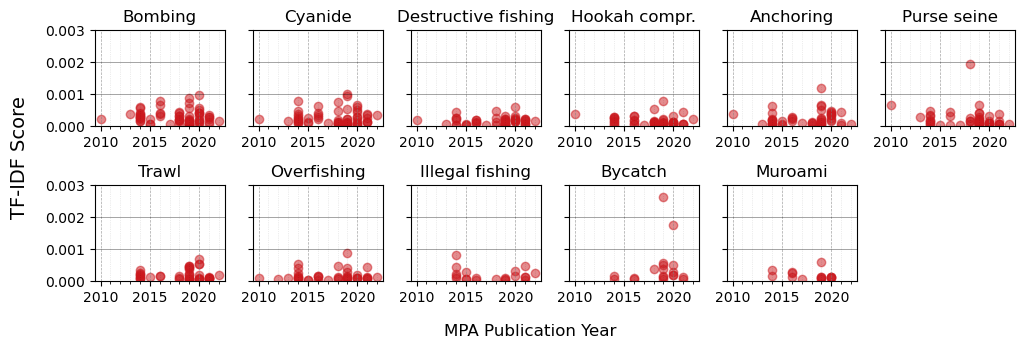

In [3]:

# Define the categories and subcategories
categories = {
    'Bombing': ['bombing'],
    'Cyanide': ['cyanide'],
    'Destructive Fishing': ['destructive fishing'],
    'Hookah Compr.': ['hookah compressor'],
    'Anchoring': ['anchoring'],
    'Purse Seine': ['purse seine'],
    'Trawl': ['trawl'],
    'Overfishing': ['overfishing'],
    'Illegal Fishing': ['illegal fishing'],
    'Bycatch': ['bycatch'],
    'Muroami': ['muroami'],
}

# Set the style to 'white'
plt.style.use('default')

# Create a list of categories to plot
categories_to_plot = ['Bombing', 'Cyanide', 'Destructive Fishing', 'Hookah Compr.', 'Anchoring',
                      'Purse Seine', 'Trawl', 'Overfishing', 'Illegal Fishing', 'Bycatch', 'Muroami']

# Calculate the number of columns for subplots
num_columns = 6
num_rows = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(10, 3.25), sharey=True)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot each category
for i, category in enumerate(categories_to_plot):
    ax = axes[i]
    for column in categories[category]:
        y_values = df[column]
        x_values = df['Year']
        
        #only points where the y-values is greater than 0
        mask= y_values>0
        ax.scatter(x_values[mask], y_values[mask], label=column, color='#cb181d', alpha=0.5)
        
        # Separate scatter plot for zero values with a different color
        ax.scatter(x_values[~mask], y_values[~mask], label=column + ' (Zero Value)', color='white', alpha=0.0001, edgecolor='#feb24c', linewidth=0.001)


    # Customize the title to show only the first word (capitalize) of each category
    ax.set_title(category.capitalize())
    ax.set_ylim(0, 0.003)  # Adjust the y-axis limits as needed
    ax.set_facecolor('white')  # Set the background color to white
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

    # Customize the appearance of grid lines inside the box
    ax.grid(which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    ax.xaxis.set_major_locator(MultipleLocator(5))  # Assuming 5 is the step between years
    
    # Add gridlines at every year
    ax.xaxis.set_minor_locator(MultipleLocator(1))  # Minor ticks for every year
    ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.15)  # Grid lines for every year
    
    # Customize y-axis ticks and gridlines
   # ax.yaxis.set_major_locator(FixedLocator([0, 0.001, 0.003]))  # Set major ticks at 0, 0.5, and 1
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))  # Minor ticks for other values
    ax.grid(axis='y', which='major', linestyle='-', linewidth=0.5, color='black', alpha=0.5)  # Major gridlines
    ax.grid(axis='y', which='minor', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)  # Minor gridlines

# Calculate the number of subplots needed based on the length of categories
num_subplots = len(categories_to_plot)

# Remove empty subplots
for j in range(num_subplots, num_columns * num_rows):
    fig.delaxes(axes[j])

# Set the y-axis label in the middle of both rows
fig.text(-0.02, 0.5, 'TF-IDF Score', va='center', rotation='vertical', fontsize=14)

# Add text below the subplots
fig.text(0.5, -0.05, 'MPA Publication Year', ha='center', fontsize=12)

# Adjust layout to prevent overlapping
plt.tight_layout()

#output_directory = 'C:/Users/capri002/OneDrive - Wageningen University & Research/Desktop/Split_Plan/Results/Figure/'
#output_file_path = output_directory + 'TFIDF_Fishing.jpg'
#plt.savefig(output_file_path, dpi=2000, bbox_inches='tight')

# Show the plots
plt.show()

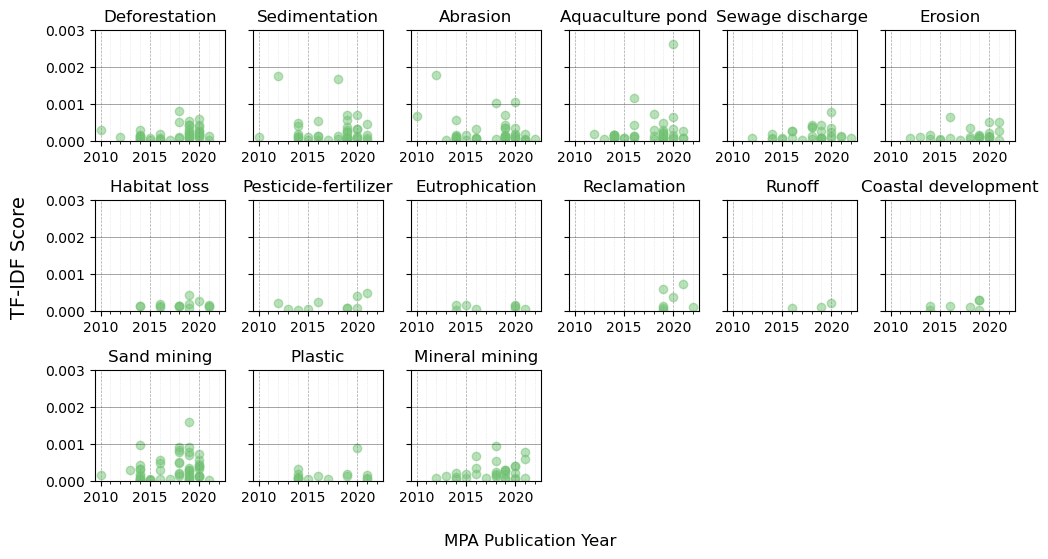

In [5]:
# Define the categories and subcategories
categories = {
    'Sedimentation': ['sedimentation'],
    'Abrasion': ['abrasion'],
    'Deforestation': ['deforestation'],
    'Aquaculture Pond': ['aquaculture pond'],
    'Erosion': ['erosion'],
    'Sewage Discharge': ['sewage discharge'],
    'Habitat Loss': ['habitat loss'],
    'Pesticide-Fertilizer': ['pesticide - fertilizer'],
    'Reclamation': ['reclamation'],
    'Eutrophication': ['eutrophication'],
    'Coastal Development': ['coastal development'],
    'Runoff': ['runoff'],
    'Sand Mining': ['sand mining'], 
    'Plastic': ['plastic'],
    'Mineral Mining': ['mineral mining'],
 
}

# Set the style to 'white'
plt.style.use('default')

# Create a list of categories to plot
categories_to_plot =['Deforestation','Sedimentation', 'Abrasion', 
              'Aquaculture Pond','Sewage Discharge', 'Erosion',
               'Habitat Loss',
              'Pesticide-Fertilizer', 'Eutrophication', 'Reclamation',
              'Runoff','Coastal Development', 'Sand Mining', 'Plastic', 'Mineral Mining'
              ]
# Calculate the number of columns for subplots
num_columns = 6
num_rows = 3

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(10, 5.25), sharey=True)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot each category
for i, category in enumerate(categories_to_plot):
    ax = axes[i]
    for column in categories[category]:
        y_values = df[column]
        x_values = df['Year']

        #only points where the y-values is greater than 0
        mask= y_values>0
        ax.scatter(x_values[mask], y_values[mask], label=column, color='#74c476', alpha=0.5)
        
        # Separate scatter plot for zero values with a different color
        ax.scatter(x_values[~mask], y_values[~mask], label=column + ' (Zero Value)', color='white', alpha=0.0001, edgecolor='#feb24c', linewidth=0.001)

    # Customize the title to show only the first word (capitalize) of each category
    ax.set_title(category.capitalize())
    ax.set_ylim(0, 0.003)  # Adjust the y-axis limits as needed
    ax.set_facecolor('white')  # Set the background color to white
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

    # Customize the appearance of grid lines inside the box
    ax.grid(which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    ax.xaxis.set_major_locator(MultipleLocator(5))  # Assuming 5 is the step between years

    # Add gridlines at every year
    ax.xaxis.set_minor_locator(MultipleLocator(1))  # Minor ticks for every year
    ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.15)  # Grid lines for every year
    
    # Customize y-axis ticks and gridlines
    #ax.yaxis.set_major_locator(FixedLocator([0, 0.5, 1]))  # Set major ticks at 0, 0.5, and 1
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))  # Minor ticks for other values
    ax.grid(axis='y', which='major', linestyle='-', linewidth=0.5, color='black', alpha=0.5)  # Major gridlines
    ax.grid(axis='y', which='minor', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)  # Minor gridlines


# Calculate the number of subplots needed based on the length of categories
num_subplots = len(categories_to_plot)
# Remove empty subplots
for j in range(num_subplots, num_columns * num_rows):
    fig.delaxes(axes[j])

# Set the y-axis label in the middle of both rows
fig.text(-0.02, 0.5, 'TF-IDF Score', va='center', rotation='vertical', fontsize=14)

# Add text below the subplots
fig.text(0.5, -0.05, 'MPA Publication Year', ha='center', fontsize=12)

# Adjust layout to prevent overlapping
plt.tight_layout()

#output_directory = 'C:/Users/capri002/OneDrive - Wageningen University & Research/Desktop/Split_Plan/Results/Figure/'
#output_file_path = output_directory + 'TFIDF_Lnad-Based.jpg'
#plt.savefig(output_file_path, dpi=2000, bbox_inches='tight')

# Show the plots
plt.show()

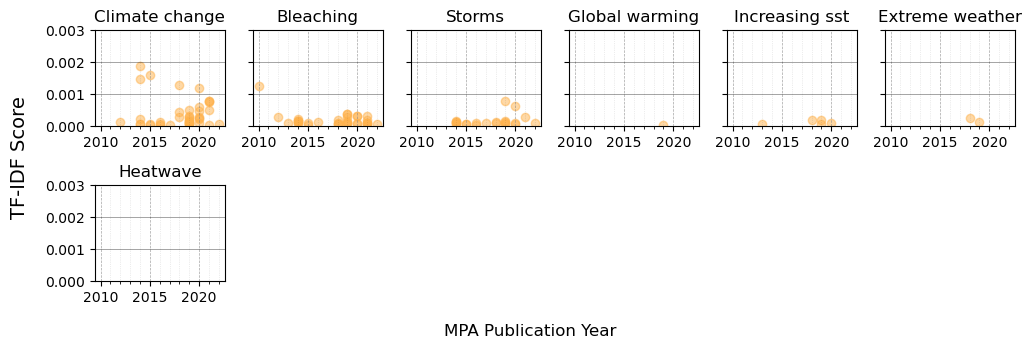

In [7]:
# Define the categories and subcategories
categories = {
    'Climate Change': ['climate change'],
    'Bleaching': ['bleaching'],
    'Storms': ['storms'],
    'Global Warming': ['global warming'],
    'Increasing SST': ['increasing SST'],
    'Extreme Weather': ['extreme weather'], 
    'Heatwave': ['heatwave']
}

# Set the style to 'white'
plt.style.use('default')

# Create a list of categories to plot
categories_to_plot =['Climate Change', 'Bleaching', 'Storms', 'Global Warming',
       'Increasing SST', 'Extreme Weather', 'Heatwave']

# Calculate the number of columns for subplots
num_columns = 6
num_rows = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(10, 3.25), sharey=True)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot each category
for i, category in enumerate(categories_to_plot):
    ax = axes[i]
    for column in categories[category]:
        y_values = df[column]
        x_values = df['Year']
        
        # Only points where the y-values are greater than 0
        mask = y_values > 0
        ax.scatter(x_values[mask], y_values[mask], label=column, color='#feb24c', alpha=0.5)
        
        # Separate scatter plot for zero values with a different color
        ax.scatter(x_values[~mask], y_values[~mask], label=column + ' (Zero Value)', color='white', alpha=0.0001, edgecolor='#feb24c', linewidth=0.001)

    # Customize the title to show only the first word (capitalize) of each category
    ax.set_title(category.capitalize())
    ax.set_ylim(0, 0.003)  # Adjust the y-axis limits as needed
    ax.set_facecolor('white')  # Set the background color to white
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

    # Customize the appearance of grid lines inside the box
    ax.grid(which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    ax.xaxis.set_major_locator(MultipleLocator(5))  # Assuming 5 is the step between years
    
    # Add gridlines at every year
    ax.xaxis.set_minor_locator(MultipleLocator(1))  # Minor ticks for every year
    ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.15)  # Grid lines for every year   
    
    # Customize y-axis ticks and gridlines
    #ax.yaxis.set_major_locator(FixedLocator([0, 0.5, 1]))  # Set major ticks at 0, 0.5, and 1
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))  # Minor ticks for other values
    ax.grid(axis='y', which='major', linestyle='-', linewidth=0.5, color='black', alpha=0.5)  # Major gridlines
    ax.grid(axis='y', which='minor', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)  # Minor gridlines
    
    # Set x-axis ticks to specific years
    ax.set_xticks([2010, 2015, 2020])

# Calculate the number of subplots needed based on the length of categories
num_subplots = len(categories_to_plot)
# Remove empty subplots
for j in range(num_subplots, num_columns * num_rows):
    fig.delaxes(axes[j])

# Set the y-axis label in the middle of both rows
fig.text(-0.02, 0.5, 'TF-IDF Score', va='center', rotation='vertical', fontsize=14)

# Add text below the subplots
fig.text(0.5, -0.05, 'MPA Publication Year', ha='center', fontsize=12)

# Adjust layout to prevent overlapping
plt.tight_layout()

#output_directory = 'C:/Users/capri002/OneDrive - Wageningen University & Research/Desktop/Split_Plan/Results/Figure/'
#output_file_path = output_directory + 'TFIDF_Climate.jpg'
#plt.savefig(output_file_path, dpi=2000, bbox_inches='tight')

# Show the plots
plt.show()


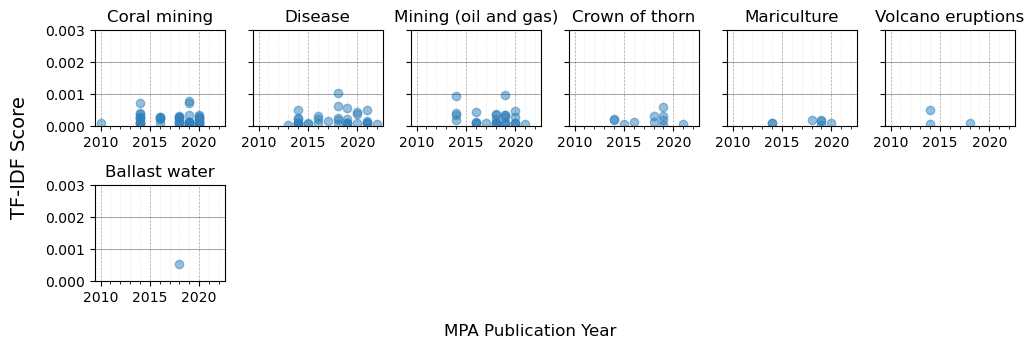

In [9]:
# Define the categories and subcategories
categories = {
    'Coral Mining': ['coral mining'],
    'Disease': ['disease'],
    'Mining (oil and gas)': ['mining (oil and gas)'],
    'Crown of Thorn': ['crown of thorn'],
    'Mariculture': ['mariculture'],
    'Volcano Eruptions': ['volcano eruptions'], 
    'Ballast Water': ['ballast water'],
}

# Set the style to 'white'
plt.style.use('default')

# Create a list of categories to plot
categories_to_plot =['Coral Mining', 'Disease',
       'Mining (oil and gas)', 'Crown of Thorn',
       'Mariculture', 'Volcano Eruptions', 'Ballast Water']
    
# Calculate the number of columns for subplots
num_columns = 6
num_rows = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(10, 3.25), sharey=True)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot each category
for i, category in enumerate(categories_to_plot):
    ax = axes[i]
    for column in categories[category]:
        y_values = df[column]
        x_values = df['Year']
        
          # Only points where the y-values are greater than 0
        mask = y_values > 0
        ax.scatter(x_values[mask], y_values[mask], label=column, color='#3182bd', alpha=0.5)
        
        # Separate scatter plot for zero values with a different color
        ax.scatter(x_values[~mask], y_values[~mask], label=column + ' (Zero Value)', color='white', alpha=0.0001, edgecolor='#feb24c', linewidth=0.001)

    # Customize the title to show only the first word (capitalize) of each category
    ax.set_title(category.capitalize())
    ax.set_ylim(0, 0.003)  # Adjust the y-axis limits as needed
    ax.set_facecolor('white')  # Set the background color to white
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

    # Customize the appearance of grid lines inside the box
    ax.grid(which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    ax.xaxis.set_major_locator(MultipleLocator(5))  # Assuming 5 is the step between years

    # Add gridlines at every year
    ax.xaxis.set_minor_locator(MultipleLocator(1))  # Minor ticks for every year
    ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.15)  # Grid lines for every year
    
    # Customize y-axis ticks and gridlines
   # ax.yaxis.set_major_locator(FixedLocator([0, 0.5, 1]))  # Set major ticks at 0, 0.5, and 1
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))  # Minor ticks for other values
    ax.grid(axis='y', which='major', linestyle='-', linewidth=0.5, color='black', alpha=0.5)  # Major gridlines
    ax.grid(axis='y', which='minor', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)  # Minor gridlines


# Calculate the number of subplots needed based on the length of categories
num_subplots = len(categories_to_plot)
# Remove empty subplots
for j in range(num_subplots, num_columns * num_rows):
    fig.delaxes(axes[j])

# Set the y-axis label in the middle of both rows
fig.text(-0.02, 0.5, 'TF-IDF Score', va='center', rotation='vertical', fontsize=14)

# Add text below the subplots
fig.text(0.5, -0.05, 'MPA Publication Year', ha='center', fontsize=12)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the plot in jpg format with good resolution and larger size
#output_directory = 'C:/Users/capri002/OneDrive - Wageningen University & Research/Desktop/Split_Plan/Results/Figure/'
#output_file_path = output_directory + 'TFIDF_other.jpg'
#plt.savefig(output_file_path, dpi=2000, bbox_inches='tight')


# Show the plots
plt.show()

In [11]:
import pandas as pd

# Load your excel file, here the excel file is tf-idf english and I add some additional information from addinfo.csv file 
df = pd.read_excel('C:/Users/capri002/OneDrive - Wageningen University & Research/000. PhD_AgustinCapriati/01. Chapters/002. Review Paper/001. Analysis_Option1/Results_Option1/Data/tfidf_absolute_TF.xlsx')

# Display the columns and their respective index
for index, column in enumerate(df.columns):
    print(f'Column Index: {index}, Column Name: {column}')

Column Index: 0, Column Name: File Name
Column Index: 1, Column Name: wordcount
Column Index: 2, Column Name: abrasion
Column Index: 3, Column Name: anchoring
Column Index: 4, Column Name: aquaculture pond
Column Index: 5, Column Name: ballast water
Column Index: 6, Column Name: bleaching
Column Index: 7, Column Name: bombing
Column Index: 8, Column Name: bycatch
Column Index: 9, Column Name: climate change
Column Index: 10, Column Name: coastal development
Column Index: 11, Column Name: coral mining
Column Index: 12, Column Name: crown of thorn
Column Index: 13, Column Name: cyanide
Column Index: 14, Column Name: deforestation
Column Index: 15, Column Name: destructive fishing
Column Index: 16, Column Name: disease
Column Index: 17, Column Name: erosion
Column Index: 18, Column Name: eutrophication
Column Index: 19, Column Name: extreme weather
Column Index: 20, Column Name: global warming
Column Index: 21, Column Name: habitat loss
Column Index: 22, Column Name: heatwave
Column Index

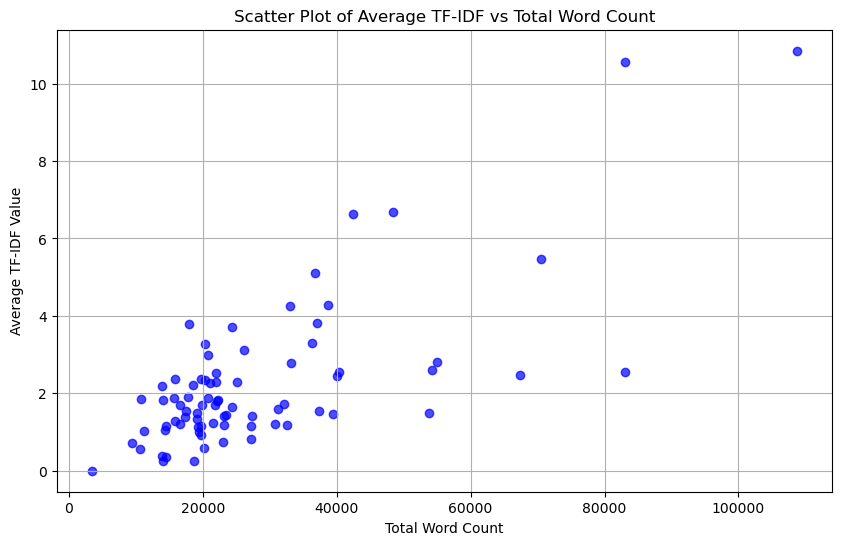

In [13]:
import matplotlib.pyplot as plt

# Identify the columns containing the TF-IDF values (from 'abrasion' to the end)
tfidf_columns = df.columns[2:]  #the first 2 columns are not TF-IDF related

# Check data types of the TF-IDF columns
#print(df[tfidf_columns].dtypes)

# Inspect object columns to understand their content
#What it does: This loops through all the TF-IDF columns that have an object data type (typically string-based columns) and prints the unique values in each of those columns.
#Purpose: To check if any of the TF-IDF columns contain unexpected non-numeric data (like strings or other data formats) before converting them to numbers.
for col in df[tfidf_columns].select_dtypes(include=['object']).columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())

# Convert object columns to numeric, forcing errors to NaN
#What it does: This attempts to convert all columns containing TF-IDF values to numeric data. If any non-numeric data is encountered, it is coerced into NaN (missing value).
#Purpose: To ensure that all TF-IDF values are numeric so that you can perform mathematical operations like calculating averages. It handles cases where text or other invalid entries are present in the numeric columns.
df[tfidf_columns] = df[tfidf_columns].apply(pd.to_numeric, errors='coerce')

# Check for NaN values in the converted DataFrame
#print("\nNaN values after conversion:")
#print(df[tfidf_columns].isna().sum())

# Calculate the average TF-IDF value per plan (row)
#What it does: This calculates the mean of the TF-IDF values across all selected columns for each row (i.e., for each document), and stores the result in a new column called 'Average TF-IDF'.
#Purpose: To compute an overall average TF-IDF score for each document, which can be used for further analysis or visualization.
df['Average TF-IDF'] = df[tfidf_columns].mean(axis=1)

#note here that Kepulauan Babar MPA is final MPA management, however, it does not have complete draft MPA management plans tho. 
#wonder whether we have to remove or not include it? 

# Create a scatter plot of Average TF-IDF values vs Total Word Count
plt.figure(figsize=(10, 6))
plt.scatter(df['wordcount'], df['Average TF-IDF'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Average TF-IDF vs Total Word Count')
plt.xlabel('Total Word Count')
plt.ylabel('Average TF-IDF Value')
plt.grid(True)
plt.show()


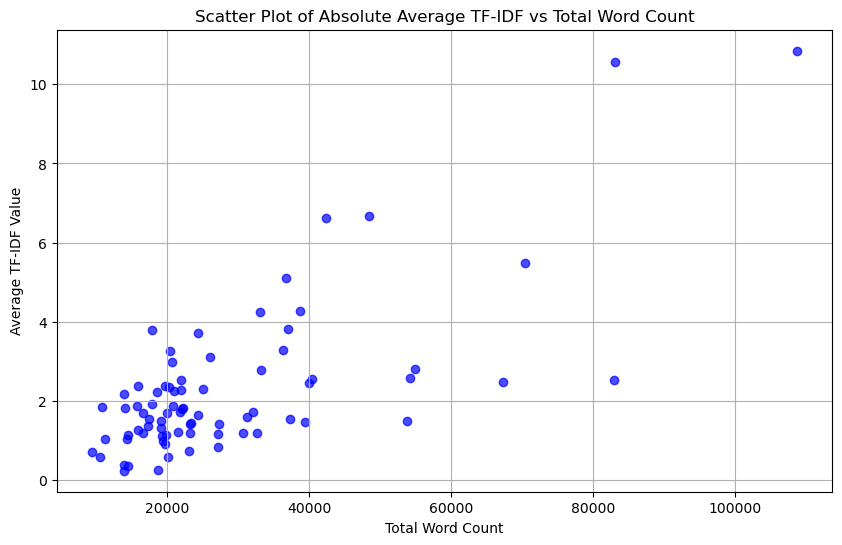

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Identify the columns containing the TF-IDF values (from 'abrasion' to the end)
tfidf_columns = df.columns[2:]  # Assuming the first 8 columns are not TF-IDF related

# Convert object columns to numeric, forcing errors to NaN
df[tfidf_columns] = df[tfidf_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the average TF-IDF value per plan (row)
df['Average TF-IDF'] = df[tfidf_columns].mean(axis=1)

# Exclude rows where Average TF-IDF is 0
df_filtered = df[df['Average TF-IDF'] != 0]

# Create a scatter plot of Average TF-IDF values vs Total Word Count
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['wordcount'], df_filtered['Average TF-IDF'], color='blue', alpha=0.7)
#plt.title('Scatter Plot of Average TF-IDF vs Total Word Count (Excluding TF-IDF = 0)')
plt.xlabel('Total Word Count')
plt.ylabel('Average TF-IDF Value')
plt.title('Scatter Plot of Absolute Average TF-IDF vs Total Word Count')
plt.grid(True)
plt.show()


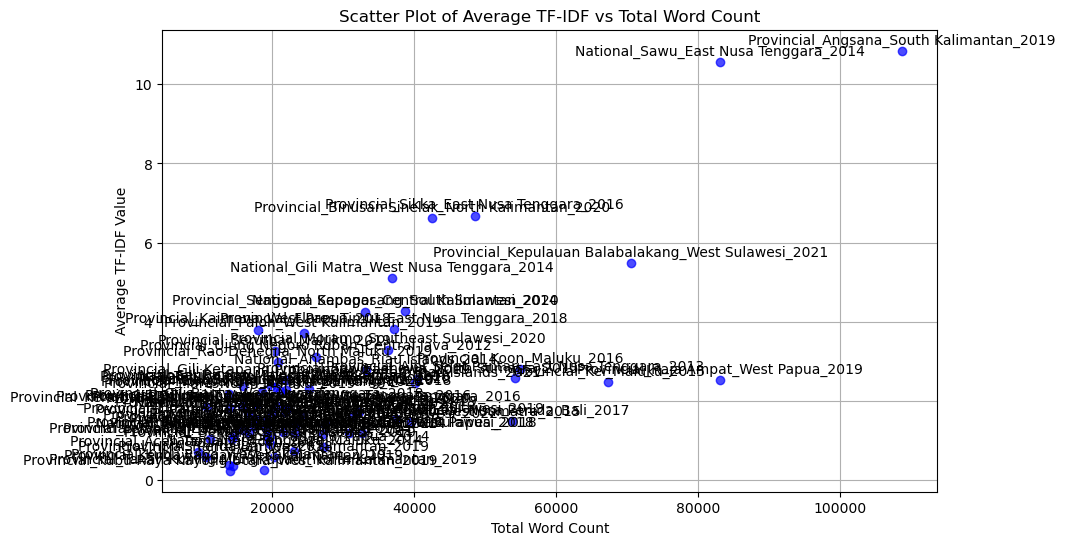

In [19]:
# Create a scatter plot of Average TF-IDF values vs Total Word Count
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['wordcount'], df_filtered['Average TF-IDF'], color='blue', alpha=0.7)

# Annotate each point with its corresponding name
for i in range(len(df_filtered)):
    plt.annotate(df_filtered.iloc[i]['File Name'],  # Annotate with the MPA Name
                 (df_filtered['wordcount'].iloc[i], df_filtered['Average TF-IDF'].iloc[i]),
                 textcoords="offset points",  # How to position the text
                 xytext=(0, 5),  # Distance from the point (x,y)
                 ha='center')

# Set titles and labels
plt.title('Scatter Plot of Average TF-IDF vs Total Word Count')
plt.xlabel('Total Word Count')
plt.ylabel('Average TF-IDF Value')
plt.grid(True)
plt.show()


C:\Users\capri002\AppData\Local\Temp\ipykernel_20368\4008165719.py:208: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


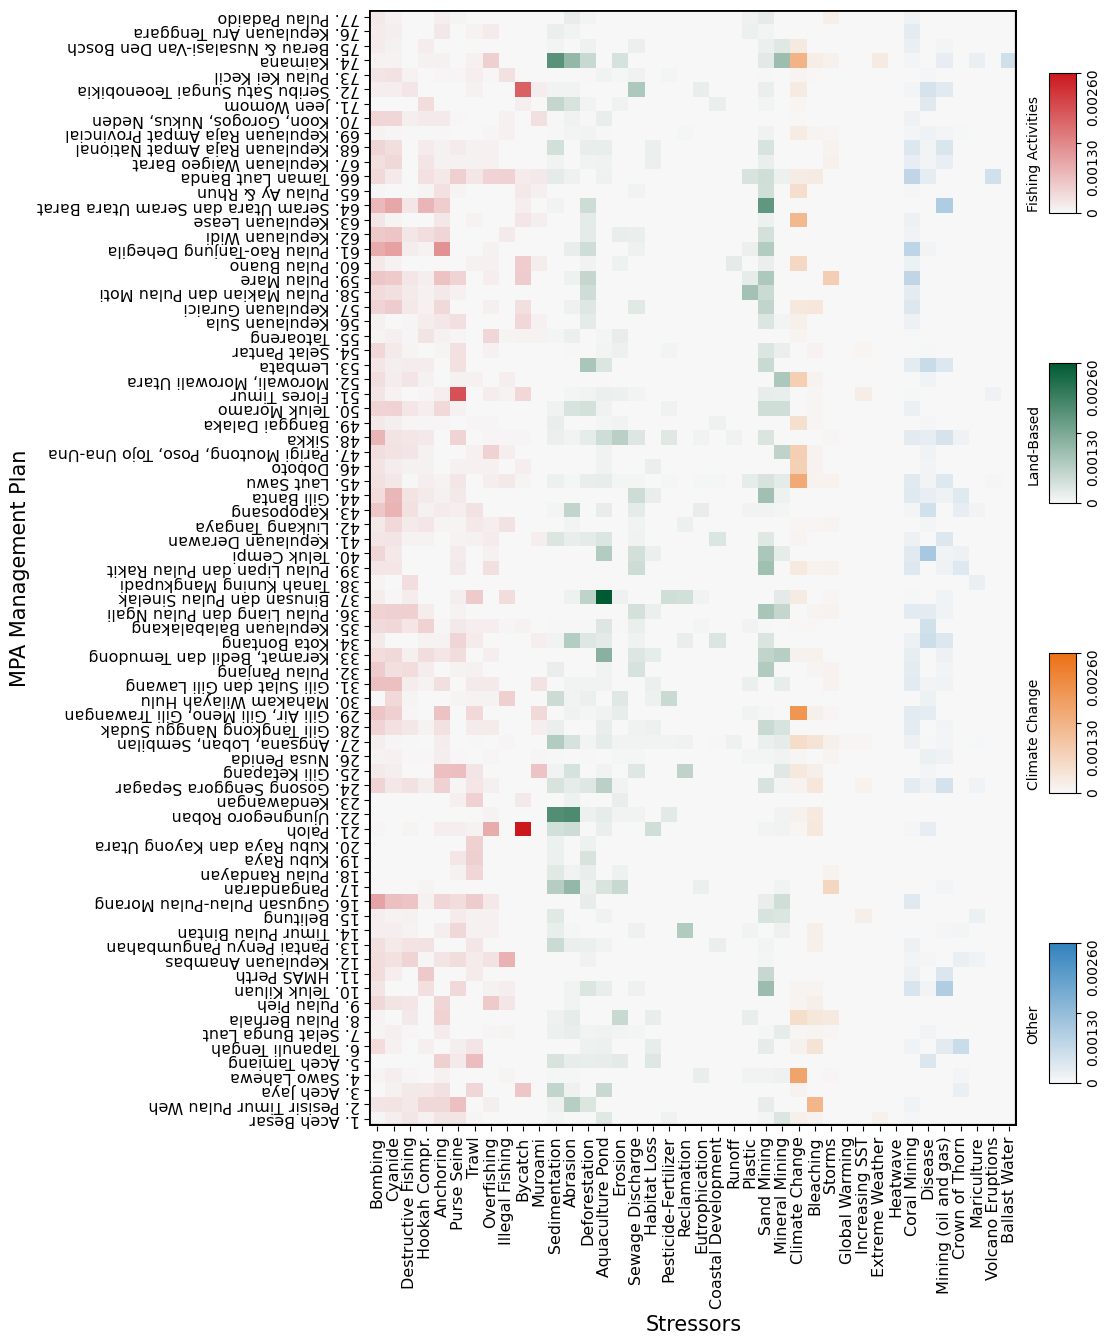

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
from matplotlib.colorbar import ColorbarBase
from matplotlib import colors

# Read the CSV file into a DataFrame
df = pd.read_excel('C:/Users/capri002/OneDrive - Wageningen University & Research/Desktop/Split_Plan/Results/Data/tfidf_relative_TF_addinfo.xlsx')

# Fill the ID_Name column with the combination of MPA ID and MPA Name
df['ID_Name'] = df['MPA_ID'].astype(str) + '. ' + df['MPA Name']

# Define the categories and subcategories
categories = {
    'Fishing Activities': {
        'Bombing': ['bombing'],
        'Cyanide': ['cyanide'],
        'Destructive Fishing': ['destructive fishing'],
        'Hookah Compr.': ['hookah compressor'],
        'Anchoring': ['anchoring'],
        'Purse Seine': ['purse seine'],
        'Trawl': ['trawl'],
        'Overfishing': ['overfishing'],
        'Illegal Fishing': ['illegal fishing'],
        'Bycatch': ['bycatch'],
        'Muroami': ['muroami'],
    },
    'Land-Based': {
        'Sedimentation': ['sedimentation'],
        'Abrasion': ['abrasion'],
        'Deforestation': ['deforestation'],
        'Aquaculture Pond': ['aquaculture pond'],
        'Erosion': ['erosion'],
        'Sewage Discharge': ['sewage discharge'],
        'Habitat Loss': ['habitat loss'],
        'Pesticide-Fertilizer': ['pesticide - fertilizer'],
        'Reclamation': ['reclamation'],
        'Eutrophication': ['eutrophication'],
        'Coastal Development': ['coastal development'],
        'Runoff': ['runoff'],
        'Plastic': ['plastic'],
        'Sand Mining': ['sand mining'],
        'Mineral Mining': ['mineral mining'],
    },
    'Climate Change': {
        'Climate Change': ['climate change'],
        'Bleaching': ['bleaching'],
        'Storms': ['storms'],
        'Global Warming': ['global warming'],
        'Increasing SST': ['increasing SST'],
        'Extreme Weather': ['extreme weather'], 
        'Heatwave': ['heatwave']
    },
    'Other': {
        'Coral Mining': ['coral mining'],
        'Disease': ['disease'],
        'Mining (oil and gas)': ['mining (oil and gas)'],
        'Crown of Thorn': ['crown of thorn'],
        'Mariculture': ['mariculture'],
        'Volcano Eruptions': ['volcano eruptions'], 
        'Ballast Water': ['ballast water'],
    }
}

# Create a DataFrame to hold the heatmap data
heatmap_data = df[['ID_Name', 'MPA_ID']].copy()

# Initialize columns for each subcategory and aggregate the scores
for category, subcategories in categories.items():
    for subcategory, keywords in subcategories.items():
        heatmap_data[subcategory] = df[keywords].sum(axis=1)

# Group by 'ID_Name' and sum the scores
heatmap_data = heatmap_data.groupby(['ID_Name', 'MPA_ID']).sum()

# Sort the DataFrame based on 'MPA ID' numerically in ascending order
heatmap_data = heatmap_data.sort_values('MPA_ID', ascending=False)

# Drop the 'MPA ID' column as it is no longer needed for plotting
heatmap_data = heatmap_data.reset_index().drop('MPA_ID', axis=1).set_index('ID_Name')

# Convert all columns to numeric, coercing errors to NaN
heatmap_data_numeric = heatmap_data.apply(pd.to_numeric, errors='coerce')

# Drop rows and columns with all NaN values to avoid unintended bars
heatmap_data_numeric = heatmap_data_numeric.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Set the base colors for each category
base_colors = {
   # 'Fishing Activities': '#99000d',  # Red
    #'Land-Based': '#005a32',           # Green
    #'Climate Change': '#ec7014',       # Yellow
    #'Other': '#0c2c84'#'#3182bd'                 # Blue
#}

    'Fishing Activities': '#cb181d',  # Red
    'Land-Based': '#005a32',           # Green
    'Climate Change': '#ec7014',       # Yellow
    'Other': '#3182bd'                 # Blue
}


# Create a color map dictionary for each subcategory
color_maps = {}
for category, subcategories in categories.items():
    for subcategory in subcategories:
        base_color = base_colors[category]
        # Ensure a gradual color change, adjusting the range of color mapping
        color_maps[subcategory] = LinearSegmentedColormap.from_list(
            subcategory,
            ['#f7f7f7',
            #525252', 
             base_color]  # Gradient from light grey to base color
        )

# Create the figure and gridspec to allow space for colorbars
fig = plt.figure(figsize=(9, 14.5))
gs = fig.add_gridspec(1, 2, width_ratios=[10, 0.5], wspace=0.05)

# Create heatmap in the left subplot
heatmap_ax = fig.add_subplot(gs[0])

# Plot the heatmap without color initially
sns.heatmap(
    heatmap_data_numeric, 
    cmap=None, 
    cbar=False, 
    linewidths=0.005,  # Set linewidth for cell borders
    linecolor='black',  # Color of grid lines
    ax=heatmap_ax
)

# Find the overall maximum value for normalization
#max_value = heatmap_data_numeric.max().max()
max_value= 0.0026
# Apply custom colors based on category and add values in each cell
for ytick in heatmap_ax.get_yticklabels():
    file_name = ytick.get_text()
    if file_name in heatmap_data.index:
        for idx, subcategory in enumerate(heatmap_data_numeric.columns):
            val = heatmap_data_numeric.loc[file_name, subcategory]

            # Find the category for the subcategory
            category_name = next(cat for cat, subs in categories.items() if subcategory in subs)

            # Normalize using the maximum value found in the data
            norm = colors.Normalize(vmin=0, vmax=max_value)
            color = color_maps[subcategory](norm(val))  # Normalize to get the color
            
            # Plot rectangles with borders
            rect = Rectangle((idx, ytick.get_position()[1] - 0.5), 1, 1, 
                             linewidth=0.125, 
                            # edgecolor='black', 
                             facecolor=color)
            heatmap_ax.add_patch(rect)

# Set y-axis labels and ticks
heatmap_ax.set_yticks([x + 0.5 for x in range(len(heatmap_data.index))])
heatmap_ax.set_yticklabels(heatmap_data.index, rotation=180, fontsize=11.5)

# Set x-axis labels and ticks
heatmap_ax.set_xticks([x + 0.5 for x in range(len(heatmap_data_numeric.columns))])
heatmap_ax.set_xticklabels(heatmap_data_numeric.columns, rotation=90, fontsize=11.5)

# Set the x-axis label
plt.xlabel('Stressors', fontsize=15, rotation=0)

# Set the y-axis label
plt.ylabel('MPA Management Plan', fontsize=15, labelpad=1)

# Add black lines on x and y axes for borders
plt.axhline(y=heatmap_ax.get_ylim()[0], color='black', linewidth=3)  # Add horizontal line at bottom
plt.axhline(y=heatmap_ax.get_ylim()[1], color='black', linewidth=2)  # Add horizontal line at top
plt.axvline(x=heatmap_ax.get_xlim()[0], color='black', linewidth=2)  # Add vertical line at left
plt.axvline(x=heatmap_ax.get_xlim()[1], color='black', linewidth=3)  # Add vertical line at right

# Add gradient legends to the right subplot
legend_ax = fig.add_subplot(gs[1])
legend_ax.axis('off')
#legend_ax.set_title('Stressors Categories', fontsize=12, pad=10, rotation=00)

# Add gradient legends for each category
for idx, (category, base_color) in enumerate(base_colors.items()):
    gradient_cmap = LinearSegmentedColormap.from_list('gradient', ['#f7f7f7',
    #525252', 
                                                                   base_color])
    
    # Position color bars to align with the heatmap's height
    heatmap_height = heatmap_ax.get_position().height
    cbar_ax = fig.add_axes([0.8805, 0.740 - (0.2 * idx), 0.03, heatmap_height * 0.125])

    # Use the overall maximum value from the heatmap data for normalization
    norm = colors.Normalize(vmin=0, vmax=max_value)

    cb = ColorbarBase(cbar_ax, cmap=gradient_cmap, norm=norm, orientation='vertical')
    
    # Set the tick labels and rotate them
    cb.set_ticks([0, max_value / 2, max_value])
    cb.set_ticklabels(['0', f'{max_value / 2:.5f}', f'{max_value:.5f}'])
    for label in cb.ax.get_yticklabels():
        label.set_rotation(90)  # Rotate labels 90 degrees (vertical)
        
    cbar_ax.text(-0.3175, 0.001095, category, fontsize=10, rotation=90, ha='right', va='center')

# Show the plot
plt.tight_layout()

# Save the plot
#output_directory = 'C:/Users/capri002/OneDrive - Wageningen University & Research/Desktop/Split_Plan/Results/Figure/'
#output_file_path = output_directory + 'Heatmap TF-IDF_relative_value_grey2.jpg'
#plt.savefig(output_file_path, dpi=2500, bbox_inches='tight')

plt.show()

Rank plans according to specificity 

<Axes: xlabel='ID_Name'>

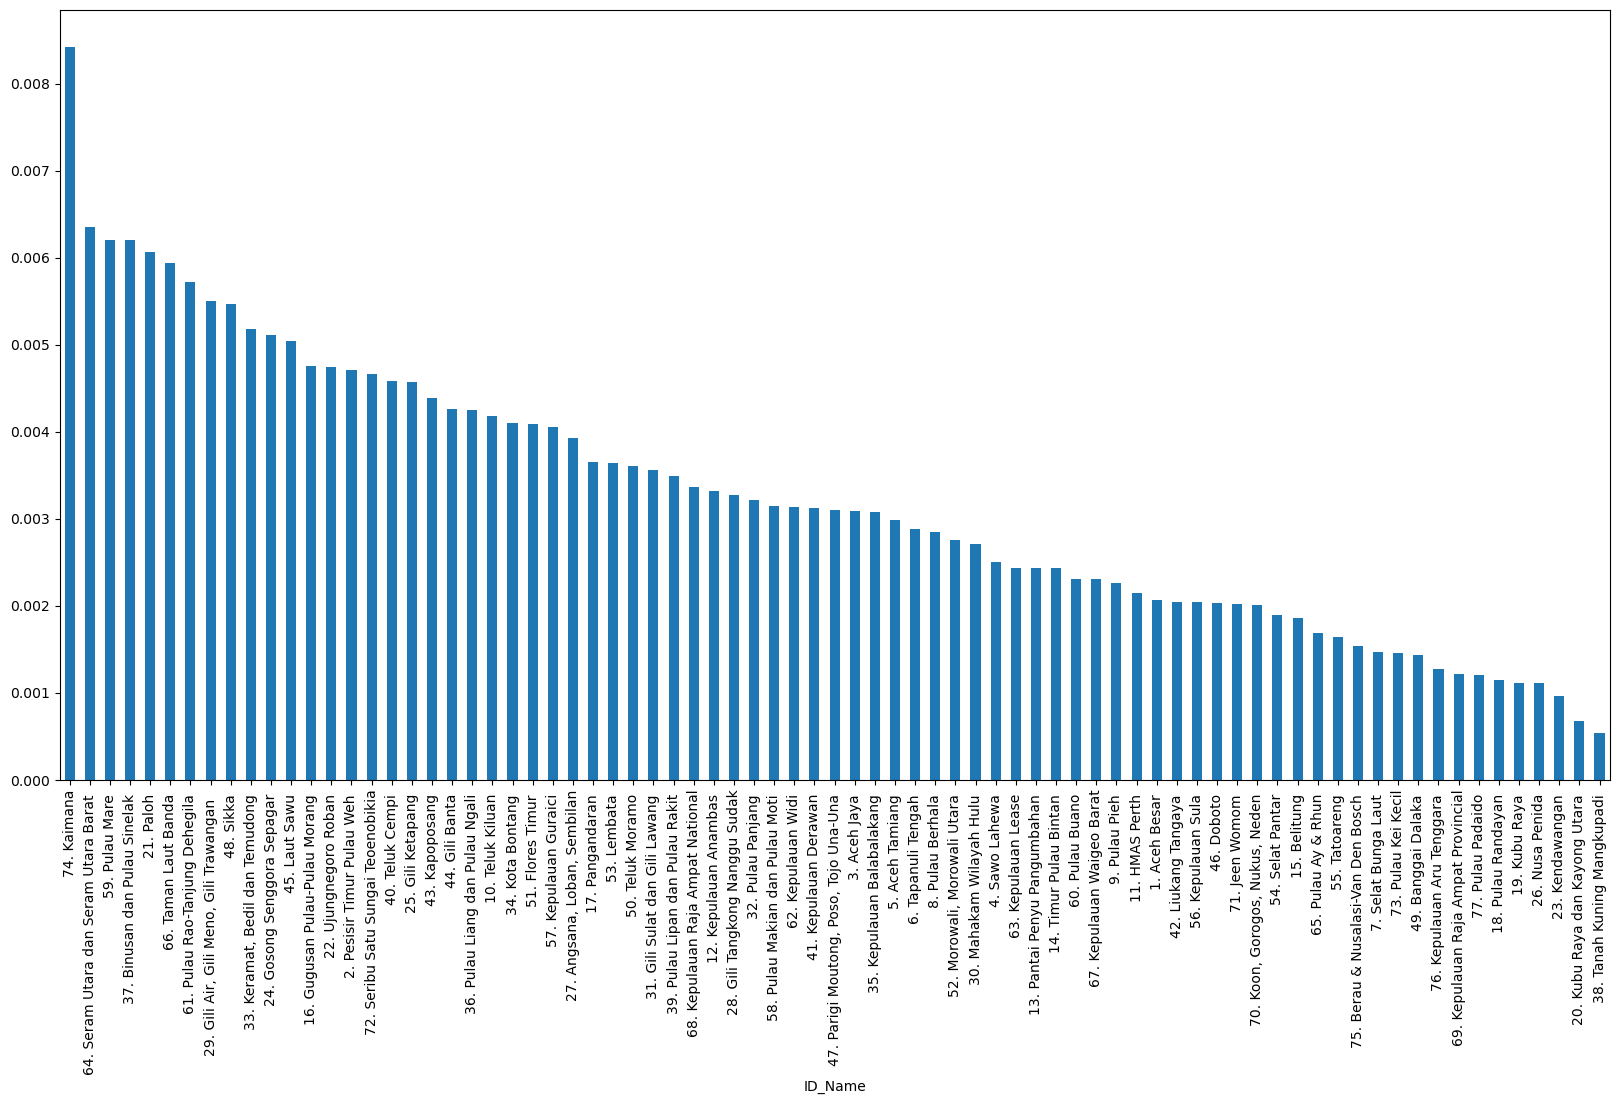

In [3]:
# based on relative frequencies
fig, ax = plt.subplots(figsize=(20,10))
heatmap_data_numeric.sum(axis=1).sort_values(ascending=False).plot.bar(ax=ax)


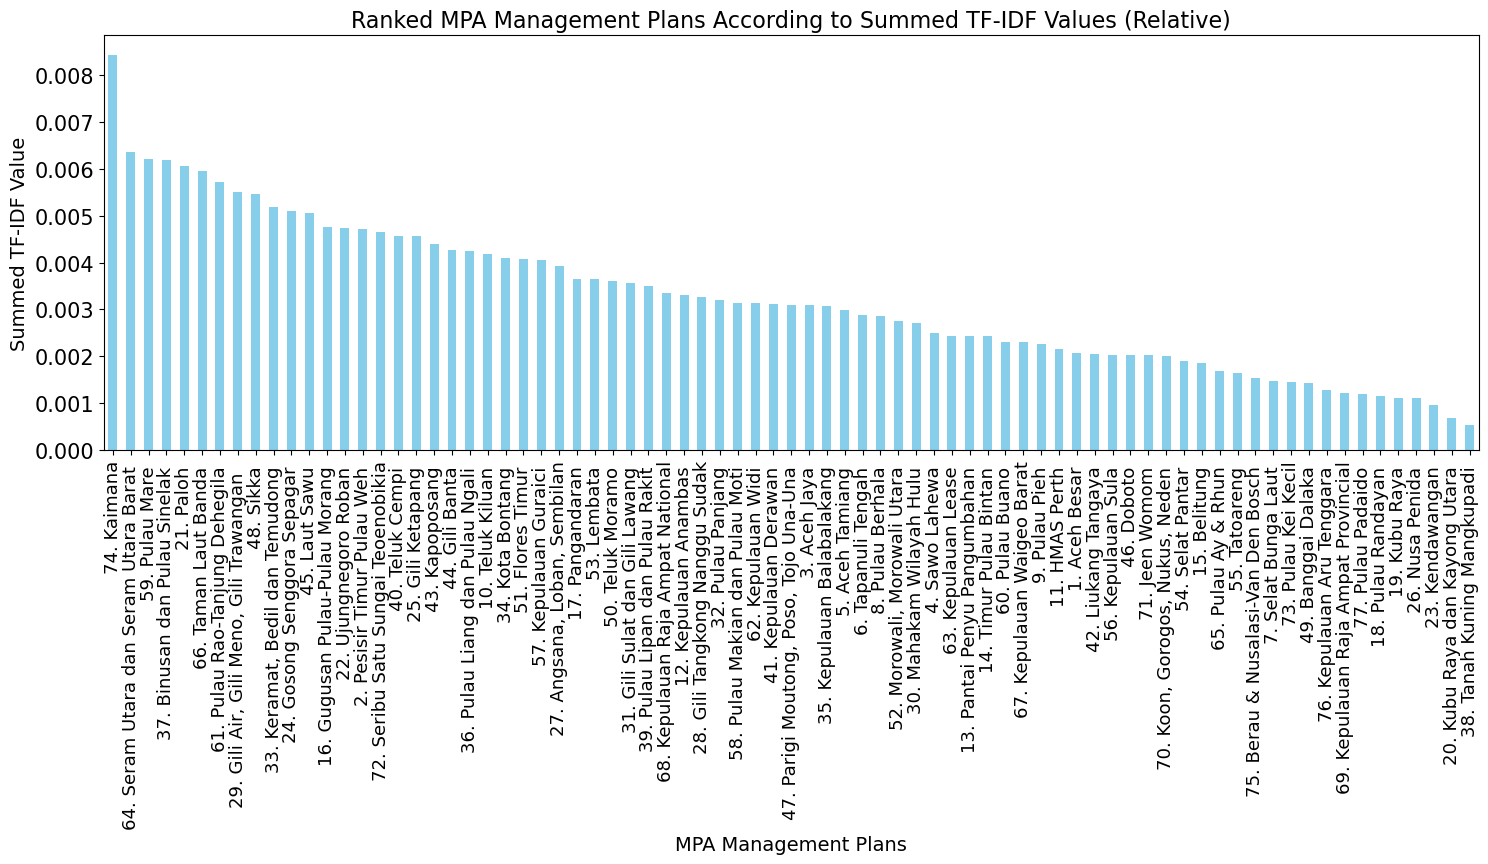

In [33]:
import matplotlib.ticker as ticker
# Compute the summed TF-IDF values for ranking
ranked_values = heatmap_data_numeric.sum(axis=1).sort_values(ascending=False)

# Create a bar plot for the summed TF-IDF values
plt.figure(figsize=(15, 8.75))
ranked_values.plot(kind='bar', color='skyblue')
plt.title('Ranked MPA Management Plans According to Summed TF-IDF Values (Relative)', fontsize=16)
plt.xlabel('MPA Management Plans', fontsize=14)
plt.ylabel('Summed TF-IDF Value', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=13)
plt.yticks(fontsize=15)

# Set major y-ticks and tick label sizes
ax = plt.gca()  # Get current axis
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Ensure integer y-ticks

# Adjust x and y tick labels
plt.xticks(rotation=90, ha='center', fontsize=13)  # X-tick font size
plt.yticks(fontsize=15)  # Y-tick font size

plt.tight_layout()

# Save the plot if needed
output_directory = 'C:/Users/capri002/OneDrive - Wageningen University & Research/Desktop/Split_Plan/Results/Figure/'
output_file_path = output_directory + 'ranked MPA TF-IDF (relative).jpg'
plt.savefig(output_file_path, dpi=2000, bbox_inches='tight')

plt.show()

In [25]:
import pandas as pd
import matplotlib.ticker as ticker

# Ensure pandas shows all rows
pd.set_option('display.max_rows', None)

# Compute the summed TF-IDF values for ranking
ranked_values = heatmap_data_numeric.sum(axis=1).sort_values(ascending=False)

# Print all ranked values
print(ranked_values)

ID_Name
74. Kaimana                                  0.008428
64. Seram Utara dan Seram Utara Barat        0.006354
59. Pulau Mare                               0.006208
37. Binusan dan Pulau Sinelak                0.006200
21. Paloh                                    0.006064
66. Taman Laut Banda                         0.005946
61. Pulau Rao-Tanjung Dehegila               0.005721
29. Gili Air, Gili Meno, Gili Trawangan      0.005507
48. Sikka                                    0.005474
33. Keramat, Bedil dan Temudong              0.005184
24. Gosong Senggora Sepagar                  0.005110
45. Laut Sawu                                0.005049
16. Gugusan Pulau-Pulau Morang               0.004754
22. Ujungnegoro Roban                        0.004749
2. Pesisir Timur Pulau Weh                   0.004712
72. Seribu Satu Sungai Teoenobikia           0.004659
40. Teluk Cempi                              0.004579
25. Gili Ketapang                            0.004568
43. Kapoposang      

In [13]:
# Find the top ten values in the heatmap data
top_ten = heatmap_data_numeric.stack().nlargest(77)

# Print the results
print("The 77 values in the heatmap:")
for (mpa_management_plan, stressor), value in top_ten.items():
    print(f'{mpa_management_plan}, Stressor: {stressor}, Value: {value:.5f}')


The 77 values in the heatmap:
37. Binusan dan Pulau Sinelak , Stressor: Aquaculture Pond, Value: 0.00263
21. Paloh , Stressor: Bycatch, Value: 0.00262
51. Flores Timur , Stressor: Purse Seine, Value: 0.00193
29. Gili Air, Gili Meno, Gili Trawangan  , Stressor: Climate Change, Value: 0.00188
22. Ujungnegoro Roban , Stressor: Abrasion, Value: 0.00178
72. Seribu Satu Sungai Teoenobikia, Stressor: Bycatch, Value: 0.00175
22. Ujungnegoro Roban , Stressor: Sedimentation, Value: 0.00175
74. Kaimana, Stressor: Sedimentation, Value: 0.00167
64. Seram Utara dan Seram Utara Barat , Stressor: Sand Mining, Value: 0.00159
4. Sawo Lahewa , Stressor: Climate Change, Value: 0.00159
45. Laut Sawu , Stressor: Climate Change, Value: 0.00148
74. Kaimana, Stressor: Climate Change, Value: 0.00128
2. Pesisir Timur Pulau Weh , Stressor: Bleaching, Value: 0.00126
63. Kepulauan Lease , Stressor: Climate Change, Value: 0.00119
61. Pulau Rao-Tanjung Dehegila , Stressor: Anchoring, Value: 0.00119
33. Keramat, Bedil

In [17]:
# Calculate the sum for each stressor across all MPA Management Plans
stressor_sums = heatmap_data_numeric.sum(axis=0)

# Get the top 10 stressors based on their summed values
top_ten_sums = stressor_sums.nlargest(40)

# Print the results
print("The 40 stressors by sum of values:")
for stressor, value in top_ten_sums.items():
    print(f'Stressor: "{stressor}", Sum Value: {value:.5f}')


The 40 stressors by sum of values:
Stressor: "Bombing", Sum Value: 0.01932
Stressor: "Sand Mining", Sum Value: 0.01832
Stressor: "Cyanide", Sum Value: 0.01628
Stressor: "Climate Change", Sum Value: 0.01589
Stressor: "Anchoring", Sum Value: 0.01179
Stressor: "Sedimentation", Sum Value: 0.01157
Stressor: "Aquaculture Pond", Sum Value: 0.01083
Stressor: "Purse Seine", Sum Value: 0.01076
Stressor: "Abrasion", Sum Value: 0.01074
Stressor: "Coral Mining", Sum Value: 0.01053
Stressor: "Deforestation", Sum Value: 0.00928
Stressor: "Bycatch", Sum Value: 0.00825
Stressor: "Mineral Mining", Sum Value: 0.00814
Stressor: "Destructive Fishing", Sum Value: 0.00810
Stressor: "Trawl", Sum Value: 0.00799
Stressor: "Hookah Compr.", Sum Value: 0.00791
Stressor: "Disease", Sum Value: 0.00751
Stressor: "Mining (oil and gas)", Sum Value: 0.00730
Stressor: "Overfishing", Sum Value: 0.00662
Stressor: "Bleaching", Sum Value: 0.00634
Stressor: "Sewage Discharge", Sum Value: 0.00555
Stressor: "Erosion", Sum Value

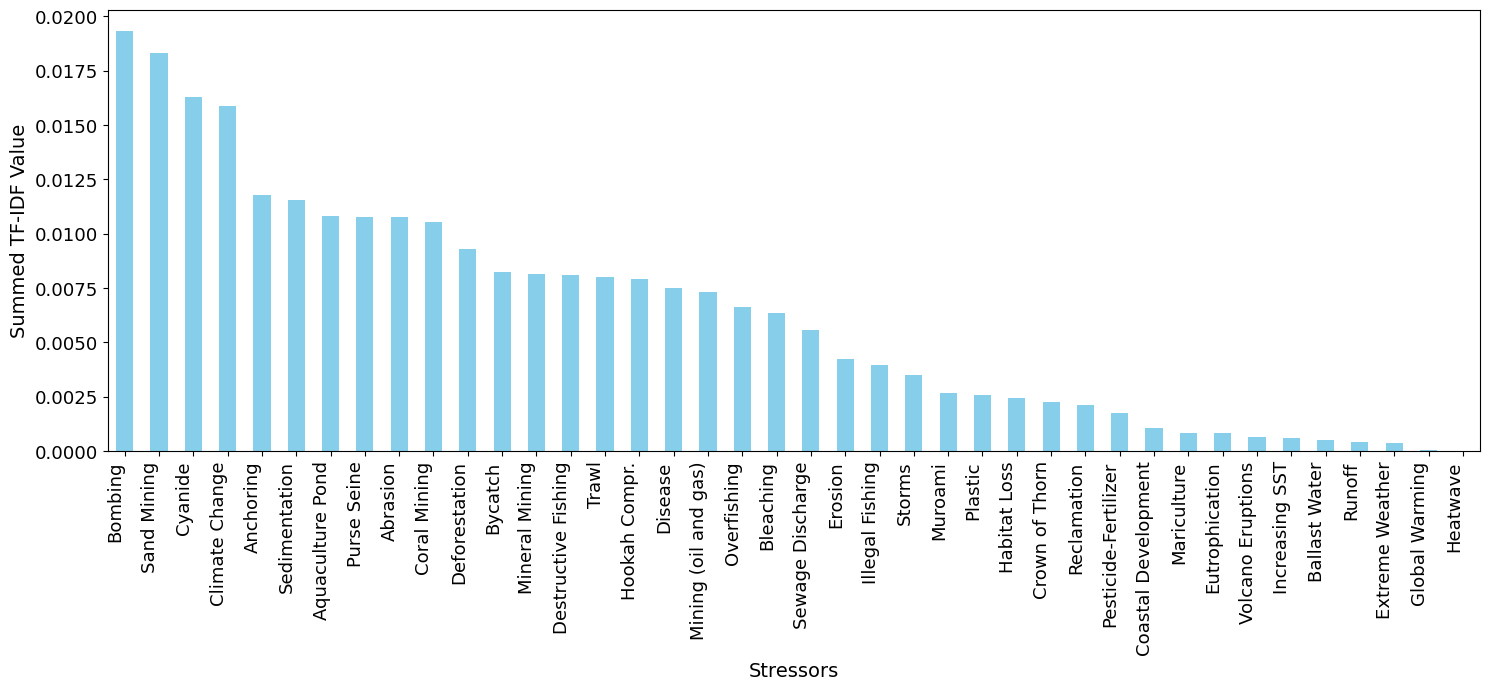

In [36]:
# Calculate the sum for each stressor across all MPA Management Plans
stressor_sums = heatmap_data_numeric.sum(axis=0)

# Get the top 40 stressors based on their summed values
top_ten_sums = stressor_sums.nlargest(40)

# Create a bar plot for the top 40 stressors
plt.figure(figsize=(15, 7))
top_ten_sums.plot(kind='bar', color='skyblue')
#plt.title('Top 40 Stressors by Summed TF-IDF Values', fontsize=16)
plt.xlabel('Stressors', fontsize=14)
plt.ylabel('Summed TF-IDF Value', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=13)
plt.yticks(fontsize=13)

# Ensure layout is tight for readability
plt.tight_layout()

# Save the plot if needed
output_directory = 'C:/Users/capri002/OneDrive - Wageningen University & Research/Desktop/Split_Plan/Results/Figure/'
output_file_path = output_directory + 'Summed MPA TF-IDF (relative).jpg'
plt.savefig(output_file_path, dpi=2000, bbox_inches='tight')

# Show the plot
plt.show()


In [11]:
# Calculate the sum for each MPA Management Plan across all stressors
management_plan_sums = heatmap_data_numeric.sum(axis=1)

# Get the top 10 Management Plans based on their summed values
top_ten_management_plans = management_plan_sums.nlargest(10)

# Print the results
print("Top 10 MPA Management Plans by sum of stressor values:")
for management_plan, value in top_ten_management_plans.items():
    print(f'Management Plan: "{management_plan}", Sum Value: {value:.5f}')


Top 10 MPA Management Plans by sum of stressor values:
Management Plan: "74. Kaimana", Sum Value: 0.00843
Management Plan: "64. Seram Utara dan Seram Utara Barat ", Sum Value: 0.00635
Management Plan: "59. Pulau Mare ", Sum Value: 0.00621
Management Plan: "37. Binusan dan Pulau Sinelak ", Sum Value: 0.00620
Management Plan: "21. Paloh ", Sum Value: 0.00606
Management Plan: "66. Taman Laut Banda ", Sum Value: 0.00595
Management Plan: "61. Pulau Rao-Tanjung Dehegila ", Sum Value: 0.00572
Management Plan: "29. Gili Air, Gili Meno, Gili Trawangan  ", Sum Value: 0.00551
Management Plan: "48. Sikka ", Sum Value: 0.00547
Management Plan: "33. Keramat, Bedil dan Temudong ", Sum Value: 0.00518


<Axes: xlabel='ID_Name'>

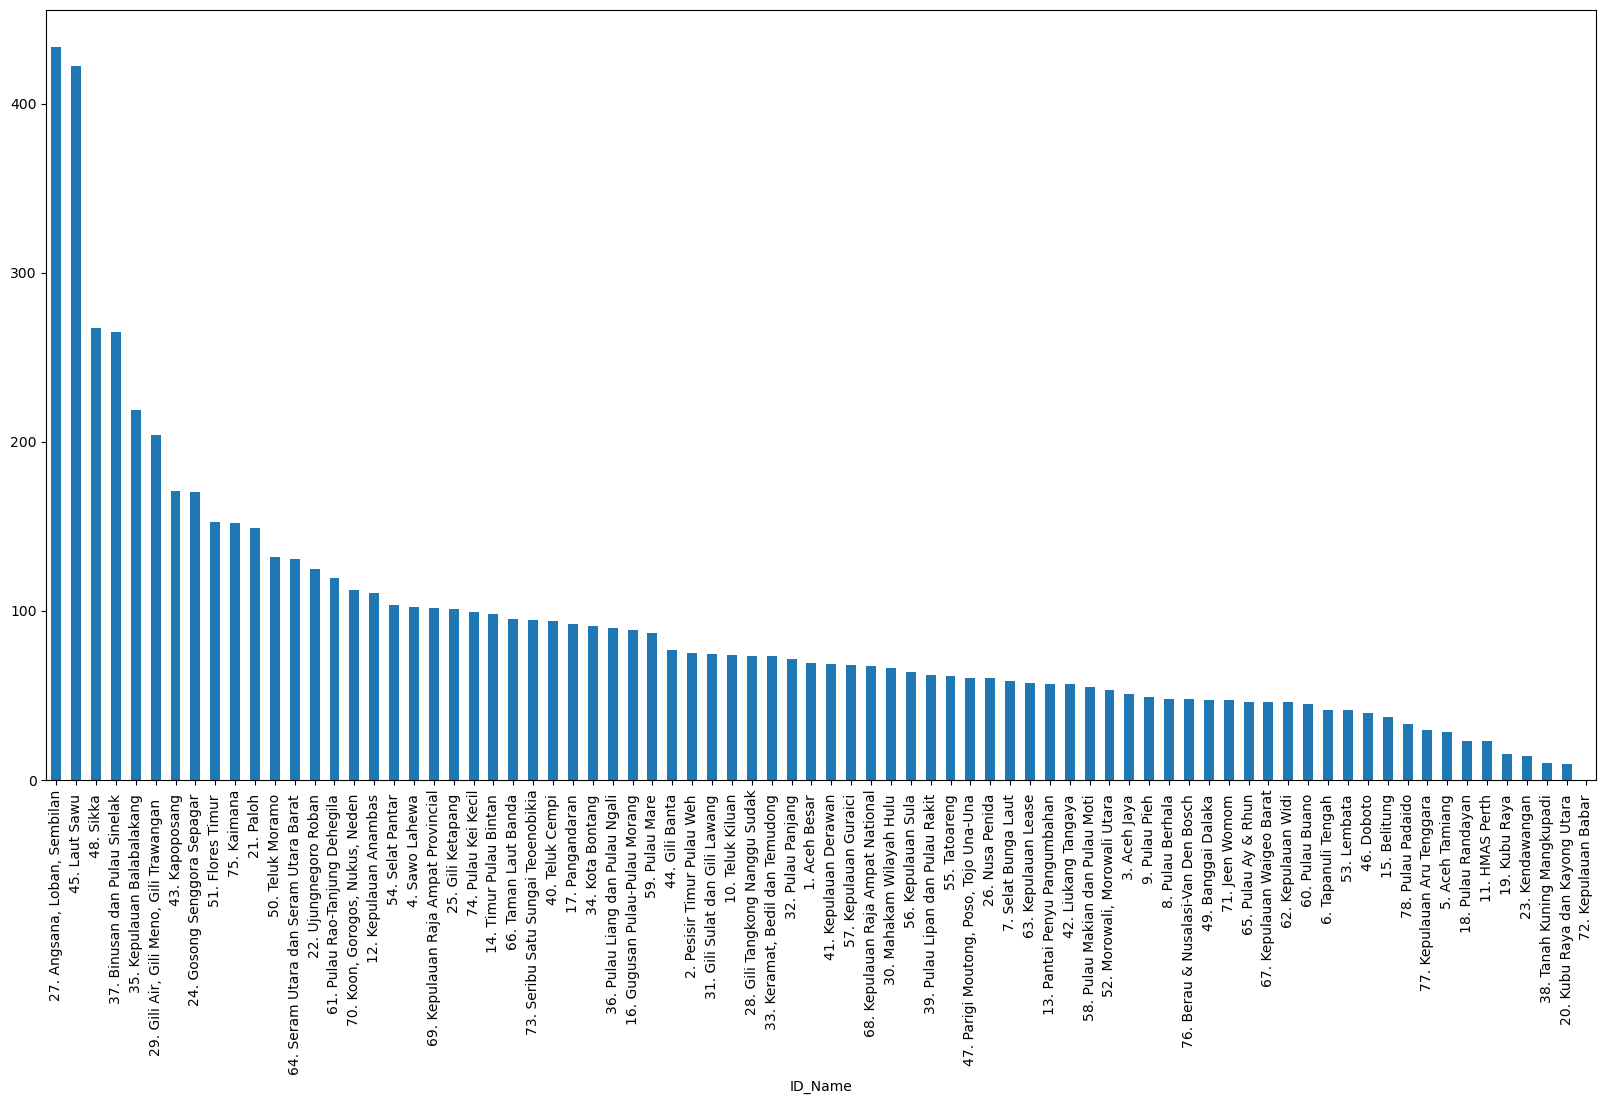

In [58]:
# based on absolute frequencies
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))
heatmap_data_numeric.sum(axis=1).sort_values(ascending=False).plot.bar(ax=ax)

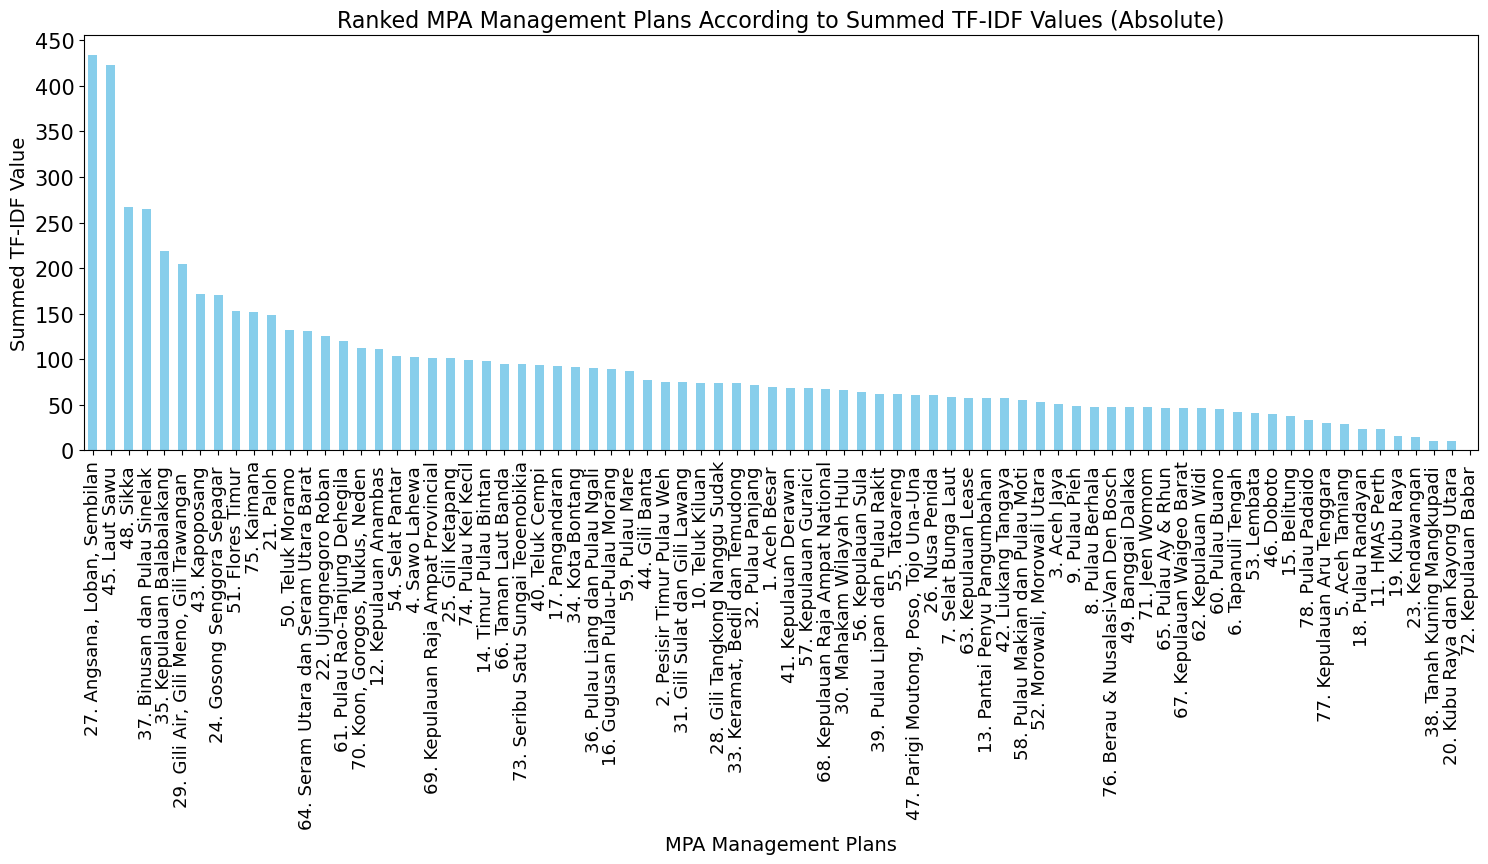

In [33]:
import matplotlib.ticker as ticker
# Compute the summed TF-IDF values for ranking
ranked_values = heatmap_data_numeric.sum(axis=1).sort_values(ascending=False)

# Create a bar plot for the summed TF-IDF values
plt.figure(figsize=(15, 8.75))
ranked_values.plot(kind='bar', color='skyblue')
plt.title('Ranked MPA Management Plans According to Summed TF-IDF Values (Absolute)', fontsize=16)
plt.xlabel('MPA Management Plans', fontsize=14)
plt.ylabel('Summed TF-IDF Value', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=13)
plt.yticks(fontsize=15)

# Set major y-ticks and tick label sizes
ax = plt.gca()  # Get current axis
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Ensure integer y-ticks

# Adjust x and y tick labels
plt.xticks(rotation=90, ha='center', fontsize=13)  # X-tick font size
plt.yticks(fontsize=15)  # Y-tick font size

plt.tight_layout()

# Save the plot if needed
#output_directory = 'C:/Users/capri002/Wageningen University & Research/'
#output_file_path = output_directory + 'Ranked_MPA_Management_Plans_TFIDF.pdf'
#plt.savefig(output_file_path, dpi=2500, bbox_inches='tight')

plt.show()

In [62]:
# Find the top ten values in the heatmap data
top_ten = heatmap_data_numeric.stack().nlargest(10)

# Print the results
print("Top ten values in the heatmap:")
for (mpa_management_plan, stressor), value in top_ten.items():
    print(f'MPA Management Plan: "{mpa_management_plan}", Stressor: "{stressor}", Value: {value:.5f}')


Top ten values in the heatmap:
MPA Management Plan: "45. Laut Sawu ", Stressor: "Climate Change", Value: 124.19068
MPA Management Plan: "37. Binusan dan Pulau Sinelak ", Stressor: "Aquaculture Pond", Value: 112.59270
MPA Management Plan: "27. Angsana, Loban, Sembilan", Stressor: "Sedimentation", Value: 79.26291
MPA Management Plan: "51. Flores Timur ", Stressor: "Purse Seine", Value: 72.40375
MPA Management Plan: "29. Gili Air, Gili Meno, Gili Trawangan  ", Stressor: "Climate Change", Value: 69.54678
MPA Management Plan: "4. Sawo Lahewa ", Stressor: "Climate Change", Value: 64.57916
MPA Management Plan: "21. Paloh ", Stressor: "Bycatch", Value: 64.09032
MPA Management Plan: "27. Angsana, Loban, Sembilan", Stressor: "Climate Change", Value: 56.29978
MPA Management Plan: "22. Ujungnegoro Roban ", Stressor: "Abrasion", Value: 46.88356
MPA Management Plan: "22. Ujungnegoro Roban ", Stressor: "Sedimentation", Value: 45.97249


In [64]:
# Calculate the sum for each stressor across all MPA Management Plans
stressor_sums = heatmap_data_numeric.sum(axis=0)

# Get the top 10 stressors based on their summed values
top_ten_sums = stressor_sums.nlargest(10)

# Print the results
print("Top 10 stressors by sum of values:")
for stressor, value in top_ten_sums.items():
    print(f'Stressor: "{stressor}", Sum Value: {value:.5f}')


Top 10 stressors by sum of values:
Stressor: "Climate Change", Sum Value: 566.30952
Stressor: "Bombing", Sum Value: 541.62181
Stressor: "Cyanide", Sum Value: 448.83060
Stressor: "Sand Mining", Sum Value: 426.34189
Stressor: "Aquaculture Pond", Sum Value: 358.99121
Stressor: "Sedimentation", Sum Value: 340.83052
Stressor: "Purse Seine", Sum Value: 308.82416
Stressor: "Abrasion", Sum Value: 306.30593
Stressor: "Anchoring", Sum Value: 303.14437
Stressor: "Coral Mining", Sum Value: 263.79390


In [66]:
# Calculate the sum for each MPA Management Plan across all stressors
management_plan_sums = heatmap_data_numeric.sum(axis=1)

# Get the top 10 Management Plans based on their summed values
top_ten_management_plans = management_plan_sums.nlargest(10)

# Print the results
print("Top 10 MPA Management Plans by sum of stressor values:")
for management_plan, value in top_ten_management_plans.items():
    print(f'Management Plan: "{management_plan}", Sum Value: {value:.5f}')


Top 10 MPA Management Plans by sum of stressor values:
Management Plan: "27. Angsana, Loban, Sembilan", Sum Value: 433.91663
Management Plan: "45. Laut Sawu ", Sum Value: 422.53080
Management Plan: "48. Sikka ", Sum Value: 267.40619
Management Plan: "37. Binusan dan Pulau Sinelak ", Sum Value: 265.13274
Management Plan: "35. Kepulauan Balabalakang ", Sum Value: 219.11582
Management Plan: "29. Gili Air, Gili Meno, Gili Trawangan  ", Sum Value: 204.16064
Management Plan: "43. Kapoposang ", Sum Value: 171.19835
Management Plan: "24. Gosong Senggora Sepagar ", Sum Value: 170.32427
Management Plan: "51. Flores Timur ", Sum Value: 152.84342
Management Plan: "75. Kaimana", Sum Value: 152.07345


In [38]:
import os
import pandas as pd
import csv

# The directory path containing the text files (all MPA management files that already converted into txt files)
#directory_path = 'C:/Users/leemp001/OneDrive - Wageningen University & Research/4_Students/PhD/Agustin Capriati/Python_Code_CH1/Python_Code_CH1/MP_Full_78MPAs'  # 78 MMAF MPAs
directory_path = 'C:/Users/capri002/OneDrive - Wageningen University & Research/000. PhD_AgustinCapriati/01. Chapters/002. Review Paper/Analysis_ch1/Split_PDF/MP_Full_78MPAs'  # 78 MMAF MPAs

# Specify the file path of the CSV file containing keywords
#keyword_file_path = 'C:/Users/leemp001/OneDrive - Wageningen University & Research/4_Students/PhD/Agustin Capriati/Python_Code_CH1/Python_Code_CH1/keywords_python.csv'
keyword_file_path = 'C:/Users/capri002/OneDrive - Wageningen University & Research/000. PhD_AgustinCapriati/01. Chapters/002. Review Paper/Analysis_ch1/keywords_python.csv'

# Specify the directory path for results
#directory_result = 'C:/Users/leemp001/OneDrive - Wageningen University & Research/4_Students/PhD/Agustin Capriati/Python_Code_CH1/Python_Code_CH1//Data/'
directory_result = 'C:/Users/capri002/OneDrive - Wageningen University & Research/000. PhD_AgustinCapriati/01. Chapters/002. Review Paper/001. Analysis_Option1/Results_Option1/Data/'

# Ensure that the directories exist
os.makedirs(directory_result, exist_ok=True)

# Load keywords from CSV file into pandas dataframe
keywords_df = pd.read_csv(keyword_file_path, delimiter=';')
keywords_df['keywords'] = keywords_df['keywords'].str.replace('COT','cot')
#display(keywords_df)

# Extract list of keywords
keywords = keywords_df.keywords.to_list()
print(keywords, '\n')

# Create a list with all texts, and a list with the accompanying filenames 
text_data = []
filenames = []
for filename in os.listdir(directory_path):
    file_name = filename.replace(".txt", "")
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)
        filenames.append(file_name)
        # Read the content of each text file
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            text_data.append(text)
print(filenames)

# Dictionary with bahasa words belonging to english stressor terms
column_mapping = {
    'abrasi': 'abrasion',
    'alat tangkap yang merusak':'destructive fishing',
    'alih fungsi lahan': 'habitat loss',    
    'aliran permukaan': 'runoff',
    'badai': 'storms',    
    'bahan bangunan': 'coral mining',    
    'bahan peledak': 'bombing',       
    'bius': 'cyanide',
    'bleaching': 'bleaching',
    'bom':'bombing',    
    
    'bukaan lahan':'habitat loss',  
    'bycatch': 'bycatch',
    'by-catch': 'bycatch',    
    'climate change': 'climate change',
    'cot': 'crown of thorn',
    'crown of thorn': 'crown of thorn',
    'cuaca ekstrim': 'extreme weather',
    'cyanida': 'cyanide',    
    'deforestasi': 'deforestation',
    
    'destructive fishing': 'destructive fishing',
    'eksploitasi berlebih': 'overfishing',
    'eksploitasi karang': 'ornamental coral trade', 
    'erosi': 'erosion', 
    'eutrofikasi': 'eutrophication', 
    'eutrophication': 'eutrophication',
    'gelombang panas': 'heatwave',
    'global warming': 'global warming',
     
    'illegal fishing': 'illegal fishing',
    'jangkar': 'anchoring',
    'jaring hela': 'purse seine',
    'kenaikan suhu air laut': 'increasing SST',
    'kekeruhan': 'turbidity',
    'kompresor': 'hookah compressor',
    'letusan gunung berapi': 'volcano eruptions',
    
    'limbah cair': 'sewage discharge',
    'limbah rumah tangga': 'sewage discharge',
    'mariculture': 'mariculture',
    'minyak dan gas': 'mining (oil and gas)',
    'muroami': 'muroami',
    'overfishing': 'overfishing',
    'pemanasan global ': 'global warming',

    'pembangunan pemukiman': 'coastal development',
    'pembiusan': 'cyanide',
    'pembuangan air balast': 'ballast water',
    'pembuangan air limbah': 'sewage discharge',
    'pemutihan': 'bleaching', 
    'penambangan': 'sand mining',
    'penangkapan berlebih': 'overfishing',
    'penangkapan ikan yang berlebih': 'overfishing',
    'penangkapan ikan yang merusak': 'destructive fishing',
    'penangkapan illegal': 'illegal fishing', 
    'penangkapan merusak': 'destructive fishing',
    
    'pencurian ikan': 'illegal fishing', 
    'penebangan': 'deforestation',
    'pengambilan batu karang': 'coral mining',
    'pengambilan karang': 'coral mining',
    'pengambilan pasir': 'sand mining',
    'pengembangan pantai': 'coastal development',
    'pengembangan pesisir':  'coastal development',
    'pengikisan pantai':'abrasion',
    
    'peningkatan suhu air laut': 'increasing SST',
    'penyakit': 'disease',
    'pertambangan': 'mineral mining',
    'perubahan habitat':'habitat loss',
    'perubahan iklim': 'climate change',    
    'pestisida': 'pesticide - fertilizer',
    'planci': 'crown of thorn',
    'plastik': 'plastic',
    'potasium': 'cyanide',
    'pukat': 'purse seine',
    'pupuk': 'pesticide - fertilizer',
    'racun':'cyanide',
    
    'reklamasi': 'reclamation',
    'runoff': 'runoff',
    'run-off': 'runoff',
    'sanitasi': 'sewage discharge',
    'sedimentasi': 'sedimentation', 
    'sianida': 'cyanide',
    'tambak': 'aquaculture pond',
    'tangkap lebih': 'overfishing',
    'tangkapan sampingan': 'bycatch',
    'trawl': 'trawl',
}


['abrasi', 'alat tangkap yang merusak', 'alih fungsi lahan', 'aliran permukaan', 'badai', 'bahan bangunan', 'bahan peledak', 'bius', 'bleaching', 'bom', 'bukaan lahan', 'bycatch', 'by-catch', 'climate change', 'cot', 'crown of thorn', 'cuaca ekstrim', 'cyanida', 'deforestasi', 'destructive fishing', 'eksploitasi berlebih', 'erosi', 'eutrofikasi', 'eutrophication', 'gelombang panas', 'global warming', 'illegal fishing', 'jangkar', 'jaring hela', 'kenaikan suhu air laut', 'kompresor', 'letusan gunung berapi', 'limbah cair', 'limbah rumah tangga', 'mariculture', 'minyak dan gas', 'muroami', 'overfishing', 'pemanasan global ', 'pembangunan pemukiman', 'pembiusan', 'pembuangan air balast', 'pembuangan air limbah', 'pemutihan', 'penambangan', 'penangkapan berlebih', 'penangkapan ikan yang berlebih', 'penangkapan ikan yang merusak', 'penangkapan illegal', 'penangkapan merusak', 'pencurian ikan', 'penebangan', 'pengambilan batu karang', 'pengambilan karang', 'pengambilan pasir', 'pengembangan 

In [40]:
wordcount = []
for text in text_data:
    num_words = float(len(text.split()))
    wordcount.append(num_words)
wordcount_df = pd.DataFrame({'wordcount' : wordcount}, index = filenames)
display(wordcount_df)

,wordcount
National_Anambas_Riau Islands_2014,33174.0
National_Aru Tenggara_Maluku_2014,23052.0
National_Banda_Maluku_2014,15847.0
National_Gili Matra_West Nusa Tenggara_2014,36767.0
National_Kapoposang_South Sulawesi_2014,38682.0
National_Padaido_Papua_2014,27214.0
National_Pieh_West Sumatra_2014,21476.0
National_Raja Ampat_West Papua_2014,19937.0
National_Sawu_East Nusa Tenggara_2014,83038.0
National_Waigeo Sebelah Barat_West Papua_2014,19789.0


In [42]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(vocabulary=keywords, lowercase=True, ngram_range=(1, 6))
count_matrix = count_vectorizer.fit_transform(text_data)
count_df= pd.DataFrame.sparse.from_spmatrix(count_matrix, index = filenames, columns = keywords)
display(count_df)

,abrasi,alat tangkap yang merusak,alih fungsi lahan,aliran permukaan,badai,bahan bangunan,bahan peledak,bius,bleaching,bom,...,reklamasi,runoff,run-off,sanitasi,sedimentasi,sianida,tambak,tangkap lebih,tangkapan sampingan,trawl
National_Anambas_Riau Islands_2014,0,1,0,0,0,1,0,0,0,9,...,0,0,0,0,0,3,0,3,0,3
National_Aru Tenggara_Maluku_2014,1,0,0,0,0,1,1,0,0,2,...,0,0,0,0,2,1,0,0,0,1
National_Banda_Maluku_2014,1,0,0,0,0,1,0,0,2,5,...,0,0,0,0,2,0,1,0,1,2
National_Gili Matra_West Nusa Tenggara_2014,2,1,0,0,1,0,8,0,1,11,...,0,0,0,0,0,11,2,0,0,8
National_Kapoposang_South Sulawesi_2014,14,0,0,0,0,2,8,7,0,11,...,0,0,0,3,1,8,4,0,0,6
National_Padaido_Papua_2014,3,0,0,0,2,1,2,0,0,2,...,0,0,0,0,0,0,0,0,0,0
National_Pieh_West Sumatra_2014,1,0,0,0,0,0,1,0,1,6,...,0,0,0,0,0,2,0,5,0,0
National_Raja Ampat_West Papua_2014,0,0,0,0,1,0,2,0,0,5,...,0,0,0,0,5,3,2,0,0,1
National_Sawu_East Nusa Tenggara_2014,2,0,0,0,4,1,3,0,2,16,...,0,0,0,2,6,0,9,1,2,0
National_Waigeo Sebelah Barat_West Papua_2014,0,0,0,0,1,0,2,1,0,3,...,0,0,0,0,1,3,1,0,0,1


In [43]:
# Rename the columns as per column_mapping
count_eng_df = count_df.rename(columns=column_mapping)
# Sum columns with the same name
count_eng_df = count_eng_df.T.groupby(count_eng_df.columns).sum().T
keywords_eng = count_eng_df.columns.to_list()
print(keywords_eng)
display(count_eng_df)

['abrasion', 'anchoring', 'aquaculture pond', 'ballast water', 'bleaching', 'bombing', 'bycatch', 'climate change', 'coastal development', 'coral mining', 'crown of thorn', 'cyanide', 'deforestation', 'destructive fishing', 'disease', 'erosion', 'eutrophication', 'extreme weather', 'global warming', 'habitat loss', 'heatwave', 'hookah compressor', 'illegal fishing', 'increasing SST', 'mariculture', 'mineral mining', 'mining (oil and gas)', 'muroami', 'overfishing', 'pesticide - fertilizer', 'plastic', 'purse seine', 'reclamation', 'runoff', 'sand mining', 'sedimentation', 'sewage discharge', 'storms', 'trawl', 'volcano eruptions']


,abrasion,anchoring,aquaculture pond,ballast water,bleaching,bombing,bycatch,climate change,coastal development,coral mining,...,plastic,purse seine,reclamation,runoff,sand mining,sedimentation,sewage discharge,storms,trawl,volcano eruptions
National_Anambas_Riau Islands_2014,0,5,0,0,0,9,0,0,0,2,...,0,7,0,0,1,0,0,0,3,0
National_Aru Tenggara_Maluku_2014,1,3,0,0,0,3,0,0,0,4,...,1,0,0,0,1,2,0,0,1,0
National_Banda_Maluku_2014,1,2,1,0,2,5,1,2,0,8,...,2,5,0,0,5,2,0,0,2,2
National_Gili Matra_West Nusa Tenggara_2014,2,16,2,0,3,19,0,42,0,7,...,1,0,0,0,1,0,0,1,8,0
National_Kapoposang_South Sulawesi_2014,14,4,4,0,0,19,0,0,0,2,...,1,3,0,0,2,1,4,0,6,0
National_Padaido_Papua_2014,3,2,0,0,0,4,0,0,0,2,...,1,1,0,0,4,0,0,2,0,0
National_Pieh_West Sumatra_2014,1,6,0,0,2,7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
National_Raja Ampat_West Papua_2014,0,1,2,0,0,7,0,0,0,5,...,0,2,0,0,5,5,0,1,1,0
National_Sawu_East Nusa Tenggara_2014,2,4,9,0,5,19,2,75,1,17,...,6,11,0,0,20,6,2,4,0,1
National_Waigeo Sebelah Barat_West Papua_2014,0,1,1,0,0,5,0,0,0,3,...,0,1,0,0,2,1,0,1,1,0


In [44]:
# simply based on counts of all words (so not only stressors), not taking into account the length of a document

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity

count_vectorizer = CountVectorizer(lowercase=True, stop_words= stopwords.words('indonesian'))
count_matrix = count_vectorizer.fit_transform(text_data)
doc_term_matrix = count_matrix.todense()
df = pd.DataFrame(
   doc_term_matrix,
   columns=count_vectorizer.get_feature_names_out(),
   index=filenames,
)
display(df)

C:\Users\capri002\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


,00,000,0000,000000,0000000,00000000,00000000000,00000000201220132014,0000001357911131517192123252729313335373941j,00000054,...,𝑌𝑡,𝑑𝑖,𝑖𝑛𝑡𝑖,𝑘𝑎𝑟𝑎𝑛𝑔,𝑘𝑎𝑤𝑎𝑠𝑎𝑛,𝑙𝑢𝑎𝑠,𝑡𝑒𝑟𝑢𝑚𝑏𝑢,𝑡𝑜𝑡𝑎𝑙,𝑥100,𝑧𝑜𝑛𝑎
National_Anambas_Riau Islands_2014,48,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
National_Aru Tenggara_Maluku_2014,8,33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
National_Banda_Maluku_2014,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
National_Gili Matra_West Nusa Tenggara_2014,21,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
National_Kapoposang_South Sulawesi_2014,16,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
National_Padaido_Papua_2014,7,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
National_Pieh_West Sumatra_2014,177,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
National_Raja Ampat_West Papua_2014,15,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
National_Sawu_East Nusa Tenggara_2014,30,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
National_Waigeo Sebelah Barat_West Papua_2014,17,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

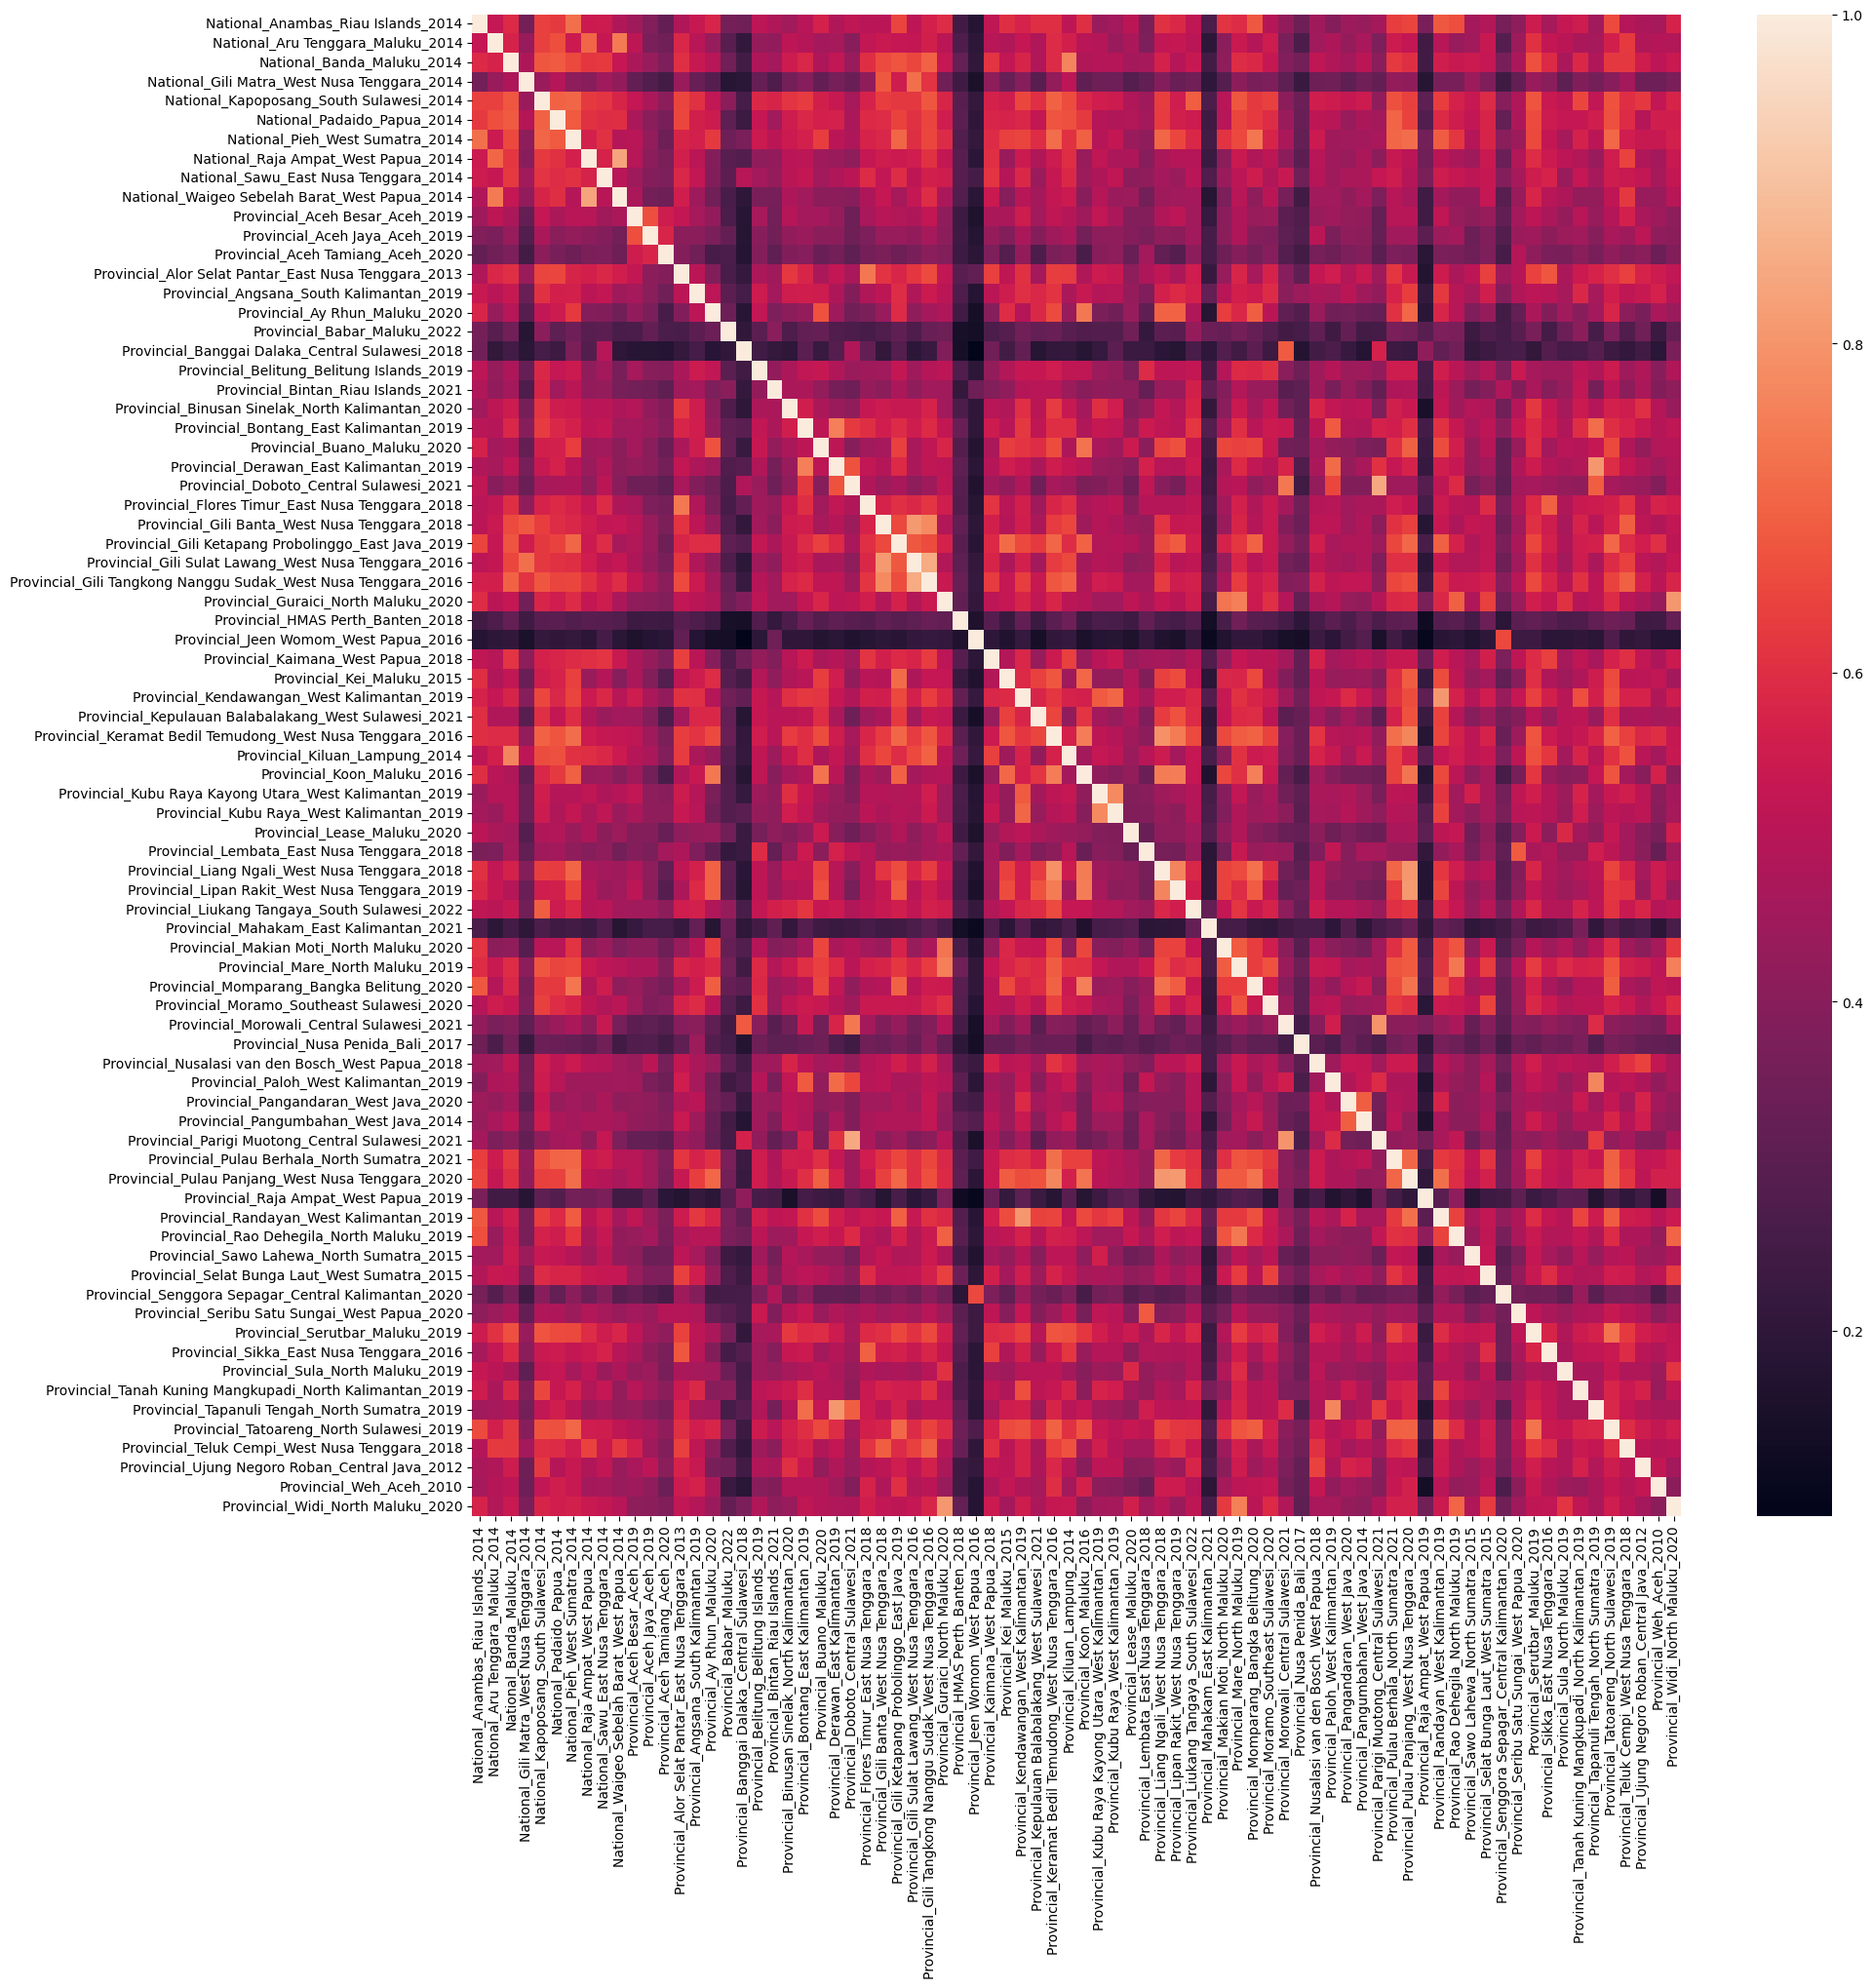

In [48]:
# plot cosine similarities
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cosine_similarity(df, df), xticklabels=filenames, yticklabels= filenames)

In [80]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\capri002\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [82]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(df, df)

# Convert to a DataFrame for easier manipulation, setting filenames as labels
cosine_sim_df = pd.DataFrame(cosine_sim, index=filenames, columns=filenames)

# Set the diagonal to NaN so we ignore self-similarities
np.fill_diagonal(cosine_sim_df.values, np.nan)

# Find the most dissimilar plans (the smallest cosine similarity scores)
most_dissimilar_pairs = cosine_sim_df.stack().sort_values().head()

# Print the most dissimilar plans
print("The most dissimilar pairs of MPA Management Plans are:")
print(most_dissimilar_pairs)

The most dissimilar pairs of MPA Management Plans are:
Provincial_Banggai Dalaka_Central Sulawesi_2018  Provincial_Jeen Womom_West Papua_2016              0.087486
Provincial_Jeen Womom_West Papua_2016            Provincial_Banggai Dalaka_Central Sulawesi_2018    0.087486
                                                 Provincial_Raja Ampat_West Papua_2019              0.103820
Provincial_Raja Ampat_West Papua_2019            Provincial_Jeen Womom_West Papua_2016              0.103820
Provincial_Jeen Womom_West Papua_2016            Provincial_Mahakam_East Kalimantan_2021            0.115964
dtype: float64


In [ ]:
cosine_sim_df

In [84]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(df, df)

# Convert to a DataFrame for easier manipulation, labeling with filenames
cosine_sim_df = pd.DataFrame(cosine_sim, index=filenames, columns=filenames)

# Set the diagonal to NaN so we ignore self-similarities (1.0 on the diagonal)
np.fill_diagonal(cosine_sim_df.values, np.nan)

# Find the most similar plans (the highest cosine similarity scores)
most_similar_pairs = cosine_sim_df.stack().sort_values(ascending=False).head()

# Print the most similar plans
print("The most similar pairs of MPA Management Plans are:")
print(most_similar_pairs)

# Plot the cosine similarity matrix as a heatmap
#fig, ax = plt.subplots(figsize=(20, 20))
#sns.heatmap(cosine_sim_df, xticklabels=filenames, yticklabels=filenames, cmap='coolwarm', annot=False, ax=ax)

#plt.title('Cosine Similarity between MPA Management Plans', fontsize=16)
#plt.xlabel('MPA Management Plans', fontsize=14)
#plt.ylabel('MPA Management Plans', fontsize=14)
#plt.xticks(rotation=90, fontsize=12)
#plt.yticks(fontsize=12)
#plt.tight_layout()

#plt.show()


The most similar pairs of MPA Management Plans are:
Provincial_Gili Sulat Lawang_West Nusa Tenggara_2016           Provincial_Gili Tangkong Nanggu Sudak_West Nusa Tenggara_2016    0.847393
Provincial_Gili Tangkong Nanggu Sudak_West Nusa Tenggara_2016  Provincial_Gili Sulat Lawang_West Nusa Tenggara_2016             0.847393
Provincial_Parigi Muotong_Central Sulawesi_2021                Provincial_Doboto_Central Sulawesi_2021                          0.845796
Provincial_Doboto_Central Sulawesi_2021                        Provincial_Parigi Muotong_Central Sulawesi_2021                  0.845796
National_Waigeo Sebelah Barat_West Papua_2014                  National_Raja Ampat_West Papua_2014                              0.834645
dtype: float64
